# **1. Introduction**

=================================================

    Objective : Proyek ini bertujuan untuk membuat sistem deteksi risiko infeksi HIV/AIDS melalui analisis data pasien dengan menggunakan berbagai algoritma machine learning seperti K-Nearest Neighbors (KNN), Support Vector Classifier (SVC), Decision Tree, Random Forest, dan XGBoost. Sistem ini akan menganalisis faktor-faktor yang memengaruhi kemungkinan terinfeksi HIV/AIDS, seperti usia, jenis kelamin, gaya hidup, dan riwayat pengobatan, dengan tujuan memberikan wawasan yang bermanfaat untuk masyarakat dan tenaga medis dalam pencegahan serta pengobatan HIV/AIDS yang lebih efektif.

=================================================


## **1.1. Background of the Problem**

HIV/AIDS merupakan salah satu masalah kesehatan global yang masih menjadi perhatian serius, termasuk di Indonesia. Menurut https://www.cnnindonesia.com/gaya-hidup/20241203114247-255-1173200/11-provinsi-ini-jadi-penyumbang-terbesar-kasus-hiv-di-indonesia pada periode Januari–September 2024, tercatat 35.415 kasus HIV dan 12.481 kasus AIDS, mendekati angka lebih dari 50 ribu kasus pada tahun sebelumnya. Sebagian besar kasus ini terkonsentrasi di Pulau Jawa, dengan DKI Jakarta sebagai penyumbang terbesar, disusul Jawa Timur, Jawa Barat, dan Jawa Tengah. Sebanyak 76 persen dari total kasus HIV di Indonesia berasal dari 11 provinsi utama. Data juga menunjukkan bahwa 71 persen kasus terjadi pada pria, dengan kelompok usia produktif 20–49 tahun sebagai yang paling terdampak.

Tingginya kasus HIV/AIDS pada usia produktif berdampak besar pada kesehatan, ekonomi, dan kehidupan masyarakat. Kelompok berisiko mencakup lelaki seks lelaki (LSL), pasangan ODHA, dan pelanggan pekerja seks. Untuk mengatasi hal ini, diperlukan sistem prediksi risiko infeksi HIV/AIDS yang menganalisis faktor seperti usia, jenis kelamin, gaya hidup, dan penggunaan obat-obatan. Dengan memanfaatkan teknik machine learning sistem ini diharapkan dapat membantu masyarakat memprediksi risiko sejak dini dan mendukung tenaga medis mengenali pasien berisiko tinggi dengan cepat. Selain meningkatkan pencegahan dan penanganan, hasil analisis ini membantu merancang strategi efektif melawan HIV/AIDS. Proyek ini direncanakan selesai dalam satu bulan.

## **1.2. SMART Analysis**

| Aspek       | Deskripsi                                                                                                                                                         |
|-------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Specific    | Membuat sistem deteksi risiko infeksi HIV/AIDS serta menganalisis faktor-faktor yang memengaruhi kemungkinan seseorang terinfeksi HIV/AIDS berdasarkan fitur seperti usia, jenis kelamin, gaya hidup, penggunaan obat-obatan, dsb. Untuk memberikan wawasan kepada masyarakat maupun tenaga kesehatan dalam pencegahan dan pengobatan. |
| Measurable  | Mengukur keberhasilan sistem melalui tingkat akurasi prediksi model dengan metrik seperti accuracy, precision, dan recall, serta mengevaluasi fitur mana saja yang paling berpengaruh terhadap prediksi infeksi HIV/AIDS. |
| Achievable  | Menggunakan teknik dan model machine learning (klasifikasi) dengan maencari model terbaik dari beberapa model machine learning yaitu K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree., Random Forest, XGBoost Kemudian memanfaatkan library Python untuk pengembangan model dan analisis faktor. |
| Relevant    | Dengan menganalisis faktor-faktor yang memengaruhi infeksi HIV/AIDS dan membangun sistem prediksi/deteksi, tenaga medis dapat lebih mudah mengenali pasien yang berisiko tinggi secara efisien. Masyarakat awam juga dapat melakukan pengecekan awal untuk mengetahui kemungkinan terinfeksi sebelum pergi ke rumah sakit. Selain itu, hasil analisis ini akan membantu pemerintah, tenaga medis, dan masyarakat dalam merancang strategi pencegahan dan penanganan HIV/AIDS secara lebih tepat dan cepat. |
| Time Bound  | Proyek ini direncanakan akan selesai dalam waktu kurang lebih 1 bulan.                                                                                            |



## **1.3. User**

- Masyarakat Umum : Membantu mengenali faktor risiko HIV/AIDS dan mengambil langkah pencegahan sejak dini.
- Tenaga Medis : Mempermudah identifikasi pasien berisiko tinggi dan perencanaan strategi penanganan yang lebih tepat.

# **2. Import Libraries**

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm


# Feature Engineering
from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer

# Machine Leaning Models
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



# Model Evaluation
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV, cross_val_score


# Model Saving
import pickle
import json

# Warnings 
import warnings
warnings.filterwarnings('ignore')

# **3. Data Loading**

Link Dataset : https://www.kaggle.com/datasets/aadarshvelu/aids-virus-infection-prediction?select=AIDS_Classification_15000.csv

| Kolom   | Deskripsi                                                                                      |
|---------|------------------------------------------------------------------------------------------------|
| time    | Waktu yang dibutuhkan hingga seseorang mengalami kegagalan atau berhenti dalam pengobatan.     |
| trt     | Jenis pengobatan yang diberikan (0 = hanya ZDV (Zidovudine); 1 = ZDV + ddI (Didanosine); 2 = ZDV + Zal (Zalcitabine); 3 = hanya ddI).   |
| age     | Usia seseorang saat memulai pengobatan.                                                        |
| wtkg    | Berat badan (dalam kilogram) seseorang pada saat memulai pengobatan.                            |
| hemo    | Apakah seseorang memiliki hemofilia (0 = tidak, 1 = ya).                                        |
| homo    | Apakah seseorang terlibat dalam aktivitas homoseksual (0 = tidak, 1 = ya).                     |
| drugs   | Apakah seseorang memiliki riwayat penggunaan narkoba suntik (0 = tidak, 1 = ya).               |
| karnof  | Skor Karnofsky, yang menunjukkan tingkat kemampuan seseorang dalam melakukan aktivitas sehari-hari (skala 0-100). |
| oprior  | Apakah seseorang telah menerima pengobatan antiretroviral non-ZDV sebelum terapi 175 (0 = tidak, 1 = ya). |
| z30     | Apakah seseorang mengonsumsi ZDV dalam 30 hari sebelum terapi 175 (0 = tidak, 1 = ya).         |
| preanti | "preanti" menunjukkan jumlah hari seseorang telah mengonsumsi terapi antiretroviral terapi antiretroviral (ARV) berbentuk obat yang biasanya dikonsumsi dalam bentuk tablet atau kapsul yang diminum setiap hari. Ada juga yang tersedia dalam bentuk suntikan dengan efek jangka panjang.                  |
| race    | Ras seseorang (0 = Putih, 1 = Non-putih).                                                      |
| gender  | Jenis kelamin seseorang (0 = Perempuan, 1 = Laki-laki).                                         |
| str2    | Riwayat penggunaan terapi antiretroviral sebelumnya (0 = belum pernah, 1 = sudah pernah).       |
| strat   | Kategori berdasarkan pengalaman sebelumnya dengan terapi antiretroviral (1 = Belum pernah, 2 = Pengalaman lebih dari 1 tapi kurang dari 52 minggu, 3 = Pengalaman lebih dari 52 minggu). |
| symptom | Apakah seseorang menunjukkan gejala penyakit (0 = tidak, 1 = ya).                              |
| treat   | Jenis pengobatan yang diberikan (0 = hanya ZDV, 1 = lainnya).                                  |
| offtrt  | Apakah seseorang berhenti pengobatan sebelum 96 minggu (0 = tidak, 1 = ya).                    |
| cd40    | Jumlah CD4 (sel kekebalan tubuh) pada awal pengobatan.                                          |
| cd420   | Jumlah CD4 (sel kekebalan tubuh) setelah 20 minggu pengobatan.                                  |
| cd80    | Jumlah CD8 (sel kekebalan tubuh) pada awal pengobatan.                                          |
| cd820   | Jumlah CD8 (sel kekebalan tubuh) setelah 20 minggu pengobatan.                                  |
| infected| Apakah seseorang terinfeksi AIDS (0 = Tidak, 1 = Ya).                                           |


## **3.1. Load Data**


In [2]:
# Membaca file CSV hasil SQL kemudian menampungnya ke dalam variabel df
df = pd.read_csv('data_aids.csv')

# Tampilkan dat
df

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,...,0,3,0,0,1,500,443,1601,849,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,953,3,46,61.28204,0,0,0,90,0,1,...,1,3,0,1,1,234,402,481,1014,0
49996,1036,0,42,73.36768,0,1,0,100,0,1,...,1,3,0,0,1,369,575,514,657,0
49997,1157,0,40,78.75824,0,1,0,100,0,1,...,1,1,0,1,0,308,663,1581,863,0
49998,596,0,31,52.20371,0,0,0,100,0,1,...,1,1,0,1,1,349,440,470,865,1


**Insight :**

Data di atas akan digunakan untuk proses resampling guna menyeimbangkan jumlah data pada kolom target, dengan mengambil masing-masing 15,000 data untuk kelas infected == 1 dan infected == 0. Hal ini bertujuan agar distribusi data menjadi seimbang, sehingga model dapat mempelajari kedua kelas secara adil dan menghasilkan prediksi yang lebih efisien dan akurat.

In [3]:
# Memisahkan df infected dan non-infected
infected_df = df[df['infected'] == 1]  # df infected
non_infected_df = df[df['infected'] == 0]  # df non-infected

# Mengambil masing-masing 15,000 df secara acak
infected_sample = infected_df.sample(n=15000, random_state=42)  # Sampel infected
non_infected_sample = non_infected_df.sample(n=15000, random_state=42)  # Sampel non-infected

# Menggabungkan kedua subset df menjadi satu dfFrame
balanced_df = pd.concat([infected_sample, non_infected_sample])

# Mengacak urutan df setelah penggabungan (opsional)
df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Menampilkan informasi df yang seimbang
print(f"Jumlah df infected: {len(infected_sample)}")
print(f"Jumlah df non-infected: {len(non_infected_sample)}")
print(f"Total df setelah digabung: {len(balanced_df)}")


Jumlah df infected: 15000
Jumlah df non-infected: 15000
Total df setelah digabung: 30000


**Insight :**

Dataset awal yang berjumlah 50.000 data telah disaring dan di-resample menjadi 30.000 data. Meskipun jumlahnya berkurang, kualitas dataset meningkat dengan mempertahankan keseimbangan antara data terinfeksi (15.000) dan tidak terinfeksi (15.000). Hal ini memastikan dataset tetap representatif, mendukung pelatihan model yang lebih efisien, serta menghasilkan prediksi yang lebih akurat dan generalisasi yang baik

In [4]:
# Save data
# df.to_csv("data_aids_new.csv")

## **3.2. Display Summary Data**



In [5]:
# Menampilkan info DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      30000 non-null  int64  
 1   trt       30000 non-null  int64  
 2   age       30000 non-null  int64  
 3   wtkg      30000 non-null  float64
 4   hemo      30000 non-null  int64  
 5   homo      30000 non-null  int64  
 6   drugs     30000 non-null  int64  
 7   karnof    30000 non-null  int64  
 8   oprior    30000 non-null  int64  
 9   z30       30000 non-null  int64  
 10  preanti   30000 non-null  int64  
 11  race      30000 non-null  int64  
 12  gender    30000 non-null  int64  
 13  str2      30000 non-null  int64  
 14  strat     30000 non-null  int64  
 15  symptom   30000 non-null  int64  
 16  treat     30000 non-null  int64  
 17  offtrt    30000 non-null  int64  
 18  cd40      30000 non-null  int64  
 19  cd420     30000 non-null  int64  
 20  cd80      30000 non-null  in

**Insight Dataset :**
- Dataset terdiri dari 30000 baris data yang indexnya dimulai dari 0 - 29999 dan terdiri dari 23 kolom
- Tidak terdapat missing value pada semua kolom
- 1 kolom bertipe float dan 22 kolom bertipe integer
- Penggunaan memori sebesar 5.3 MB

**Next Step :**
- Kolom wtkg  diubah dari tipe data float menjadi integer karena nilai berat badan umumnya direpresentasikan dalam angka bulat untuk keperluan analisis data yang lebih sederhana dan konsisten
- Memperhatikan kolom numerical dan kategorikal karena kolom kategorikal pada dataset sudah ter-encode dan bertipe integer

**Notes :**

Kolom Kategorikal akan dibiarkan sebagai Integer karena model klasifikasi yang akan digunakan Decisison Tree, Support Vector Classifier (SVC), Random Forest, XGBoost, dan K-Nearest Neighbors (KNN) dapat bekerja langsung dengan kolom kategorikal yang telah diencode menjadi integer sehingga tidak perlu mengubahnya menjadi tipe object karena model ini hanya melihat nilai numeriknya tanpa asumsi matematis.


## **3.3. Change the Data Type of the Wtkg Column**


In [6]:
# Mengubah tipe data kolom 'wtkg' dibulatkan menjadi integer 
df['wtkg'] = df['wtkg'].round().astype(int)

print(df['wtkg'].dtype)

int32


In [7]:
df.head(5)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1155,0,28,62,0,0,1,90,0,1,...,0,1,0,1,1,341,616,1833,1122,1
1,1148,2,44,90,0,1,0,90,0,1,...,1,2,0,1,0,211,540,1288,453,0
2,361,0,35,68,0,1,0,100,1,1,...,1,2,0,0,0,276,484,1092,1035,0
3,1162,2,40,82,0,0,0,100,0,0,...,0,1,0,0,0,171,336,2829,1274,0
4,1105,1,26,65,0,0,0,100,0,1,...,1,3,0,1,0,385,289,709,659,1


**Insight :**

Berdasarkan hasil di atas, dapat dilihat bahwa tipe data kolom 'wtkg' berhasil diubah menjadi integer

## **3.4. Check and Handle Duplicates Data**


In [8]:
# Mengecek data duplikat
print(f"Jumlah data yang duplikat :", df.duplicated().sum())

# Mengecek jumlah data setelah berhasil di remove
print(f"\nJumlah keseluruhan data : ",len(df))

# Menghapus data duplikat
df.drop_duplicates(inplace = True)

# Mengurutkan kembali index data setelah menangani data duplikat
df.reset_index(drop = True, inplace=True)

# Mengecek jumlah data setelah berhasil di remove
print(f"Jumlah data setelah diremove duplicate : ",len(df))


Jumlah data yang duplikat : 0

Jumlah keseluruhan data :  30000
Jumlah data setelah diremove duplicate :  30000


**Insight :**

Dengan menggunakan kode di atas, dapat dilihat bahwa tidak ada data yang terindikasi sebagai data duplicates

## **3.5. Check Misssing Values**


In [9]:
# Mengecek jumlah nilai missing value pada masing-masing kolom
df.isnull().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

**Insight :**

Dengan menggunakan kode di atas, dapat dilihat bahwa tidak ada data yang missing values

In [10]:
# Melihat describe kolom numerical
df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,863.332933,1.360167,34.286433,75.548367,0.035000,0.651967,0.127633,96.795833,0.044933,0.687567,...,0.625033,2.029400,0.086300,0.723333,0.336000,313.251433,427.759967,1042.007733,902.942167,0.500000
std,312.703678,1.237483,7.072528,12.031795,0.183783,0.476355,0.333687,5.107656,0.207161,0.463493,...,0.484122,0.891532,0.280811,0.447358,0.472347,101.699775,143.690047,484.914530,338.772536,0.500008
min,66.000000,0.000000,12.000000,42.000000,0.000000,0.000000,0.000000,76.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,81.000000,96.000000,173.000000,0.000000
25%,527.000000,0.000000,29.000000,68.000000,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,232.000000,318.000000,710.000000,649.000000,0.000000
50%,1033.000000,1.000000,35.000000,74.000000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,290.000000,402.000000,884.000000,853.000000,0.500000
75%,1134.000000,3.000000,39.000000,81.000000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,389.000000,519.000000,1243.000000,1078.000000,1.000000
max,1231.000000,3.000000,68.000000,145.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,901.000000,1119.000000,4656.000000,3128.000000,1.000000


# **4. Exploratory Data Analysis**

In [11]:
# Salin DataFrame asli untuk analisis
df_eda = df.copy()

## 4.1. Distribution Data and Detection Outliers (Numerical)

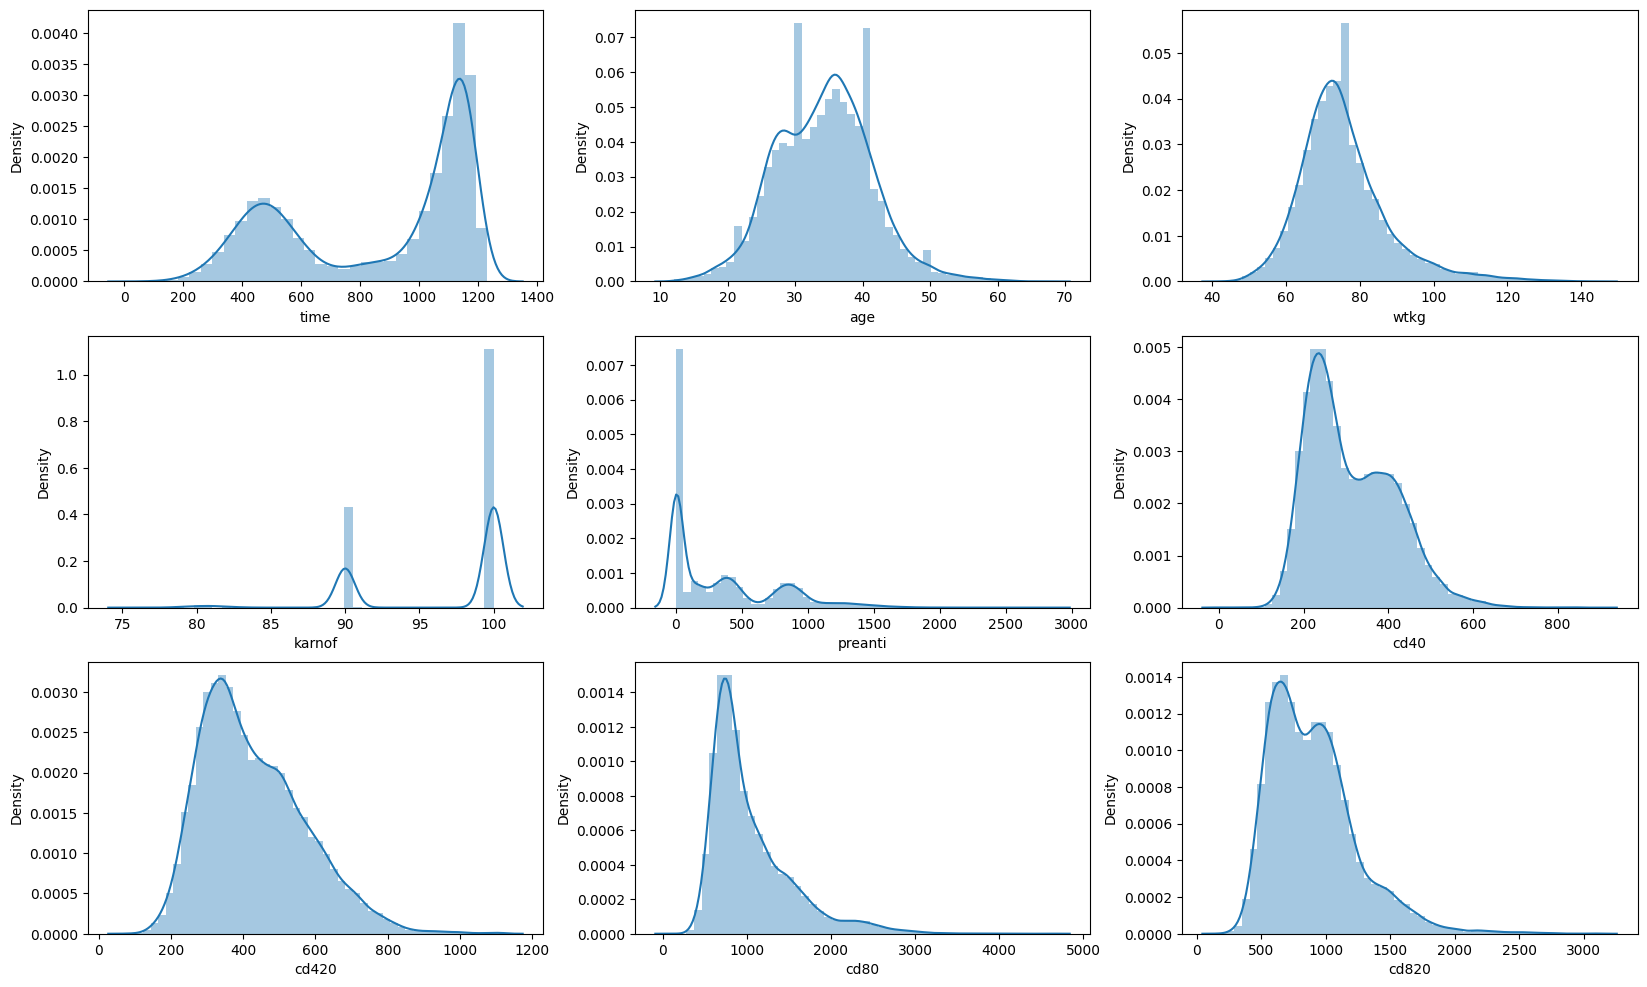

In [12]:
# Define kolom numerical untuk kebutuhan eda
num_columns = ["time", "age", "wtkg", "karnof", "preanti", "cd40", "cd420", "cd80", "cd820"]

plt.figure(figsize=(20,12))

for i in enumerate(df_eda[num_columns].describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(df[i[1]])
plt.show()

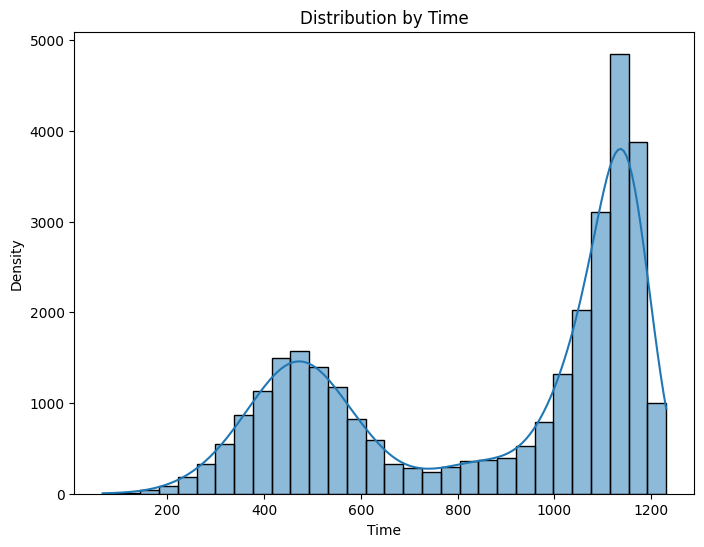

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi untuk kolom age
plt.figure(figsize=(8, 6))
sns.histplot(df_eda["time"], kde=True, bins=30)
plt.title("Distribution by Time")
plt.xlabel("Time")
plt.ylabel("Density")
plt.show()


In [21]:
df_eda["time"].mean()

863.3329333333334

**Insight :**

- time: Waktu yang dibutuhkan hingga seseorang berhenti pengobatan berkisar antara 0-1400, dengan konsentrasi utama di sekitar 1000, menunjukkan distribusi nilai yang cukup tinggi

- age: Usia berkisar antara 10-70 tahun, dengan rata-rata di sekitar 30-40 tahun dimana usia tersebut tergolong usia produktif

- wtkg: Berat badan saat memulai pengobatan berkisar antara 40-140 kg, dengan konsentrasi utama di sekitar 60-90 kg
- karnof: Skor Karnofsky berkisar antara 75-100 dengan mayoritas nilai berada di skor 100 yang menunjukkan sebagian besar individu dalam kondisi kesehatan yang baik

- preanti: Nilai preanti (jumlah hari mengonsumsi atriretroviral) berkisar antara 0-3000, dengan mayoritas di bawah 500

- cd40: Distribusi nilai cd40 jumlah sel kekebalan tubuh pada awal pengobatan berkisar antara 0-1000, dengan dua puncak utama di sekitar 200 dan 400

- cd420: Nilai cd420 jumlah sel kekebalan tubuh setelah 20 minggu pengobatan berkisar antara 0-1200, dengan konsentrasi utama di sekitar 400-600

- cd80: Nilai cd80 jumlah sel kekebalan tubuh pada awal pengobatanberkisar antara 0-5000, dengan konsentrasi utama di bawah 1000, menunjukkan adanya nilai ekstrem di sisi kanan

- cd820: Nilai cd820 jumlah sel kekebalan tubuh setelah 20 minggu pengobatan berkisar antara 0-3500, dengan konsentrasi utama di sekitar 500-1000, menunjukkan pola distribusi mirip dengan cd80

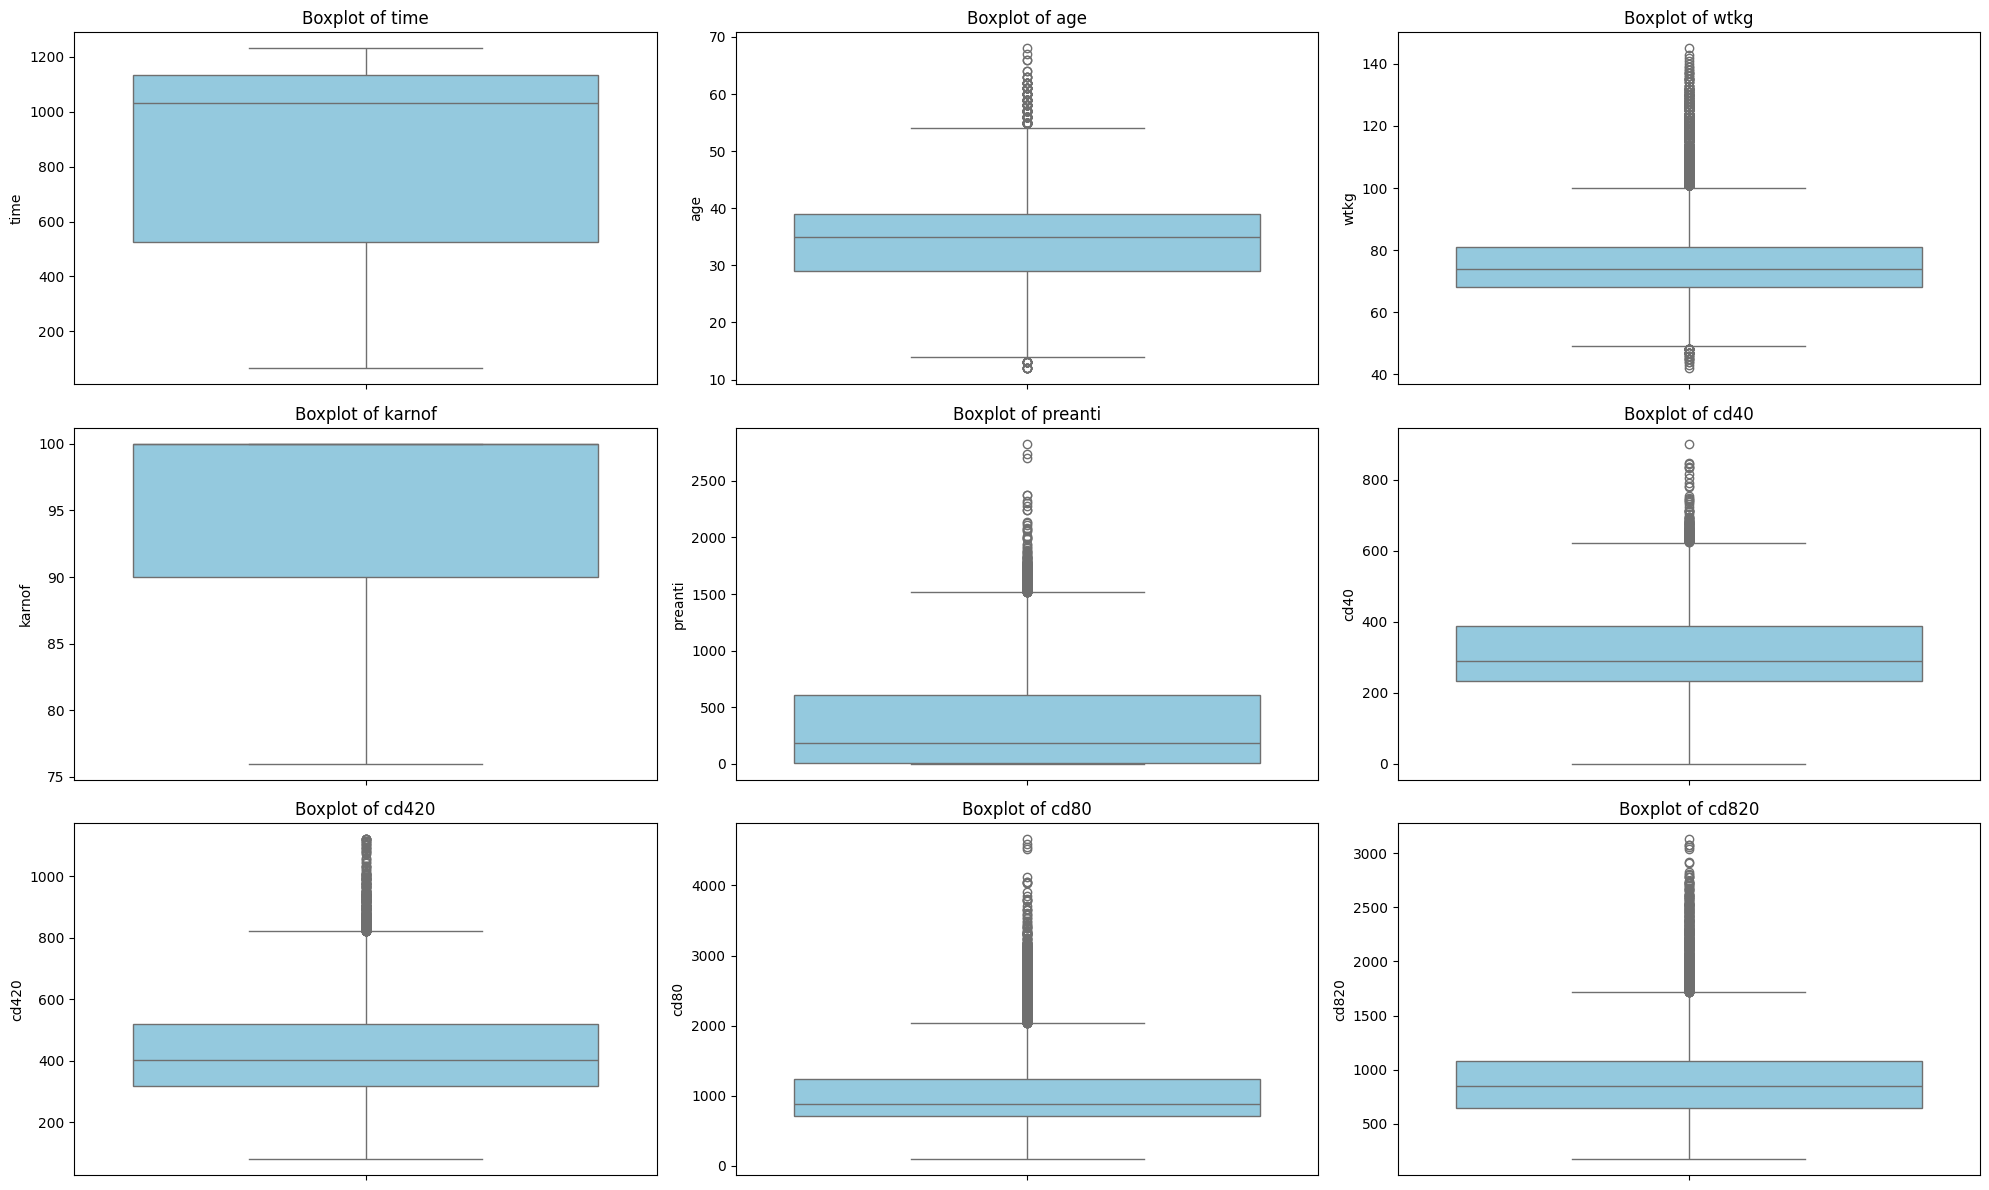

In [13]:
# Melihat persebaran outliers 
plt.figure(figsize=(20, 12))
for i, col in enumerate(df_eda[num_columns], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df_eda[num_columns], y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


**Insight :**

Berdasarkan hasil di atas, dapat dilihat bahwa fitur age, wtkg, preanti, cd40, cd420, cd80, dan cd820 memiliki distribusi yang tidak normal atau terdapat data outlier. Oleh karena itu, pada tahap selanjutnya untuk melakukan analisi korelasi metode yang digunakan adalah Spearman, karena metode ini sesuai untuk data yang tidak terdistribusi normal dan efektif dalam menganalisis hubungan antar variabel numerikal

## **4.2. Correlation (Numeric) with Infection Status**

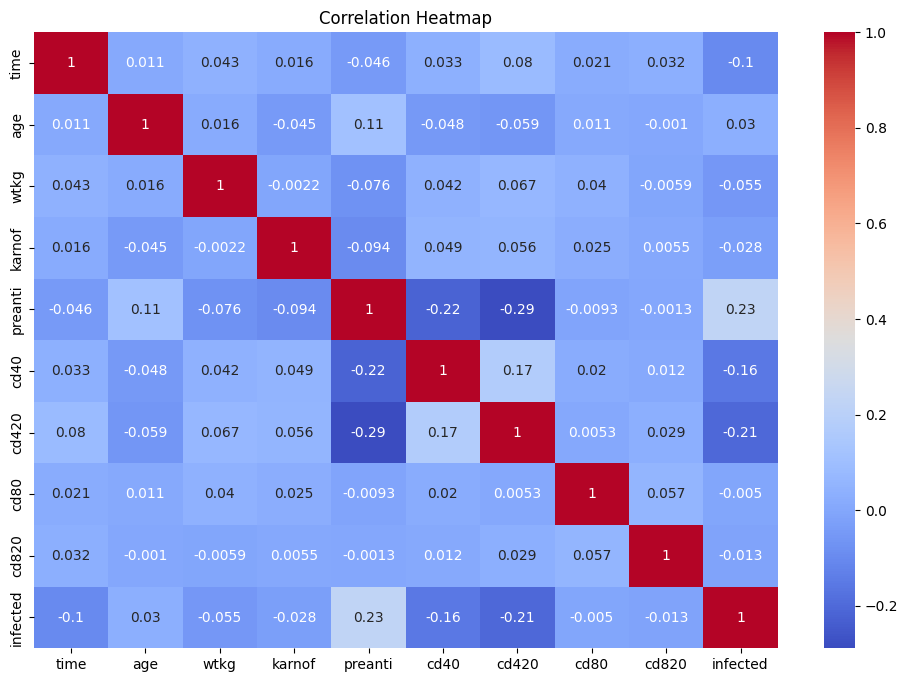

In [14]:
# Buat heatmap korelasi
num_col = ["time", "age", "wtkg", "karnof", "preanti", "cd40", "cd420", "cd80", "cd820", "infected"]

plt.figure(figsize=(12, 8))
sns.heatmap(df_eda[num_col].corr(method='spearman'), annot=True, fmt='.2g', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

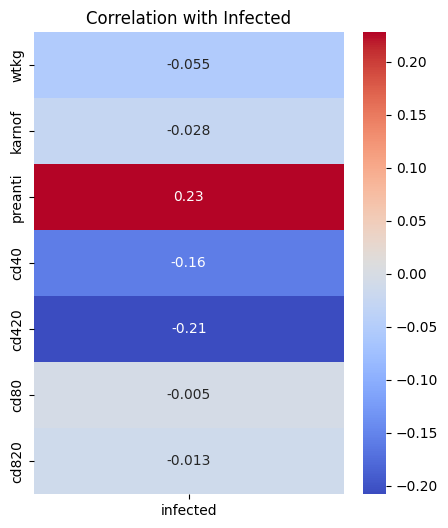

In [28]:
# Pilih hanya kolom numerik yang relevan untuk infected
num_col = ["wtkg", "karnof", "preanti", "cd40", "cd420", "cd80", "cd820", "infected"]

# Hitung korelasi
corr_matrix = df_eda[num_col].corr(method='spearman')

# Ambil hanya korelasi infected dengan variabel lain
corr_infected = corr_matrix[["infected"]].drop("infected")

# Plot heatmap
plt.figure(figsize=(5, 6))
sns.heatmap(corr_infected, annot=True, fmt='.2g', cmap='coolwarm', cbar=True)
plt.title("Correlation with Infected")
plt.show()


**Insight :**

Berdasarkan hasil kprelasi heatmap di atas dapat dilihat bahwa fitur "infected" memiliki hubungan yang cukup kuat dengan preanti (0.23), yang menunjukkan bahwa tindakan sebelum pengobatan mungkin berhubungan dengan status infeksi. Sebaliknya, cd420 (-0.21) dan cd40 (-0.16) memiliki hubungan negatif, yang berarti nilai lebih tinggi dari kedua fitur ini mungkin terkait dengan tingkat infeksi yang lebih rendah. Fitur lain, seperti age, wtkg, dan cd80, hampir tidak memiliki pengaruh terhadap infeksi.

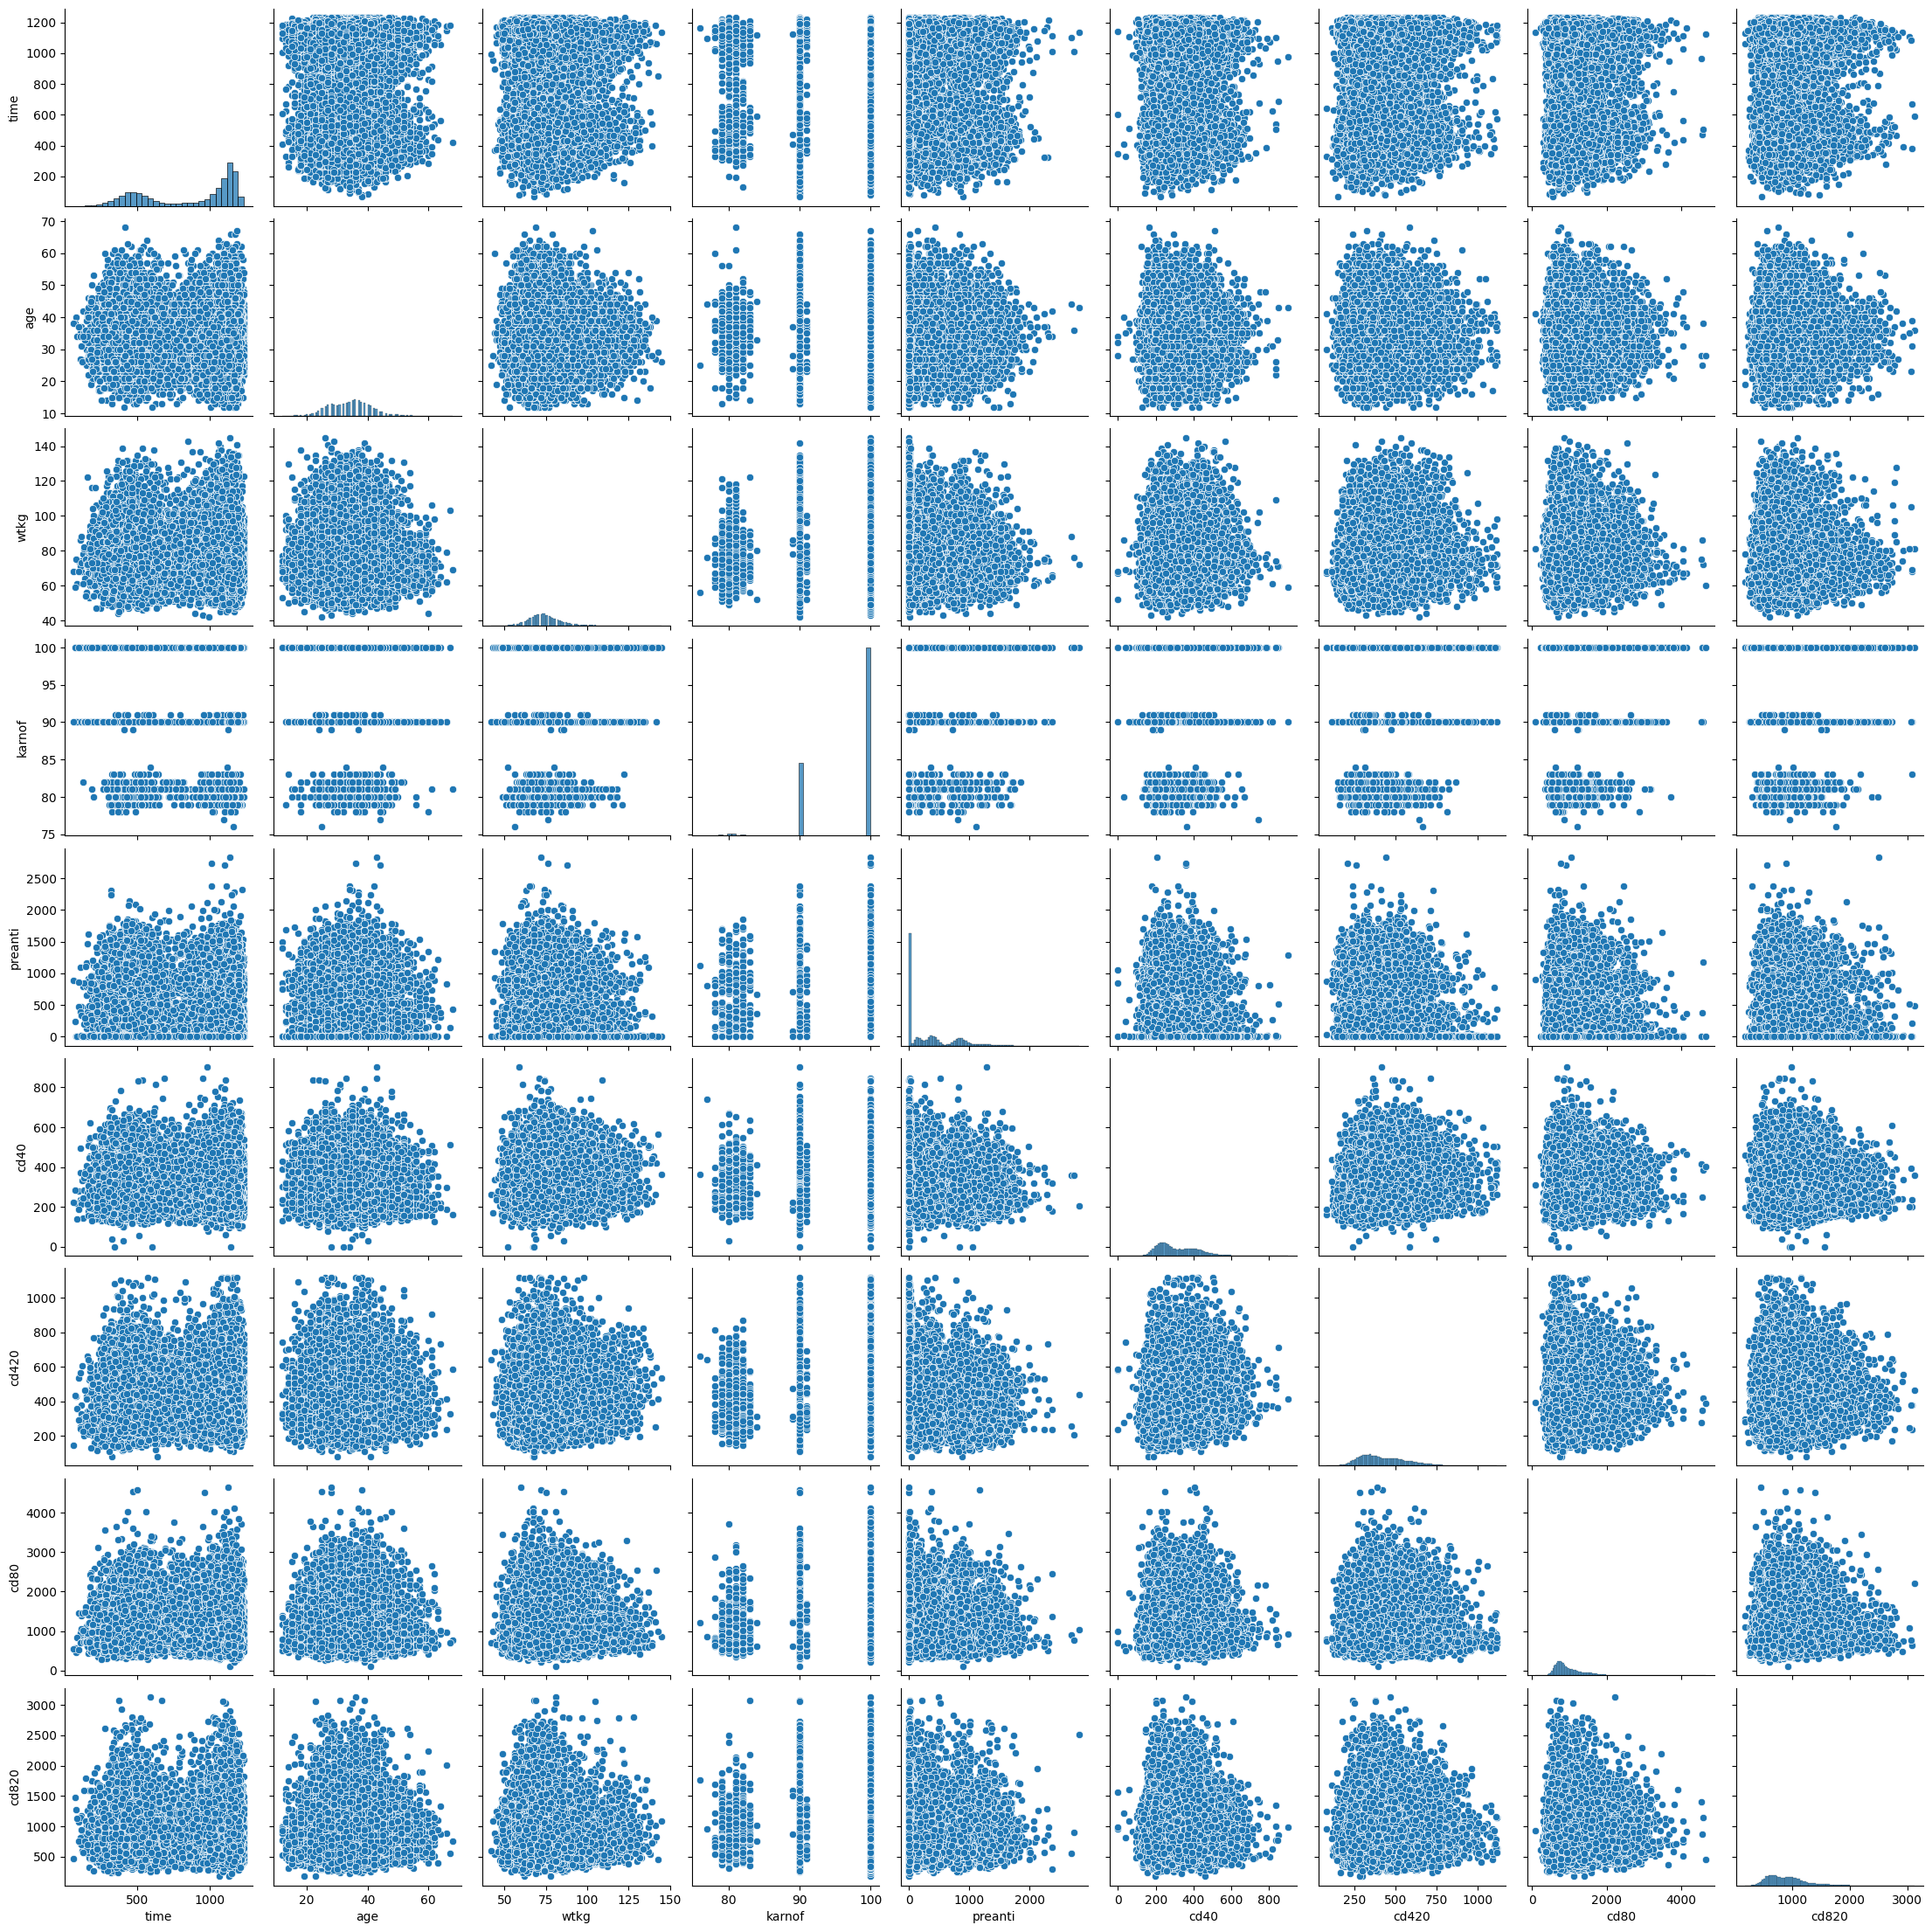

In [15]:
sns.pairplot(df[num_columns])

**Insight :**

Gambar pairplot di atas digunakan untuk memvisualisasikan distribusi data dan melihat hubungan antar variabel dalam dataset. Fungsi ini akan menampilkan histogram untuk menggambarkan distribusi masing-masing variabel dan scatter plot untuk menunjukkan hubungan antar pasangan variabel, sehingga memudahkan identifikasi pola atau korelasi untuk kebutuhan analisis lebih lanjut.





## **4.3. Percentage Distribution Data (Categorical)**

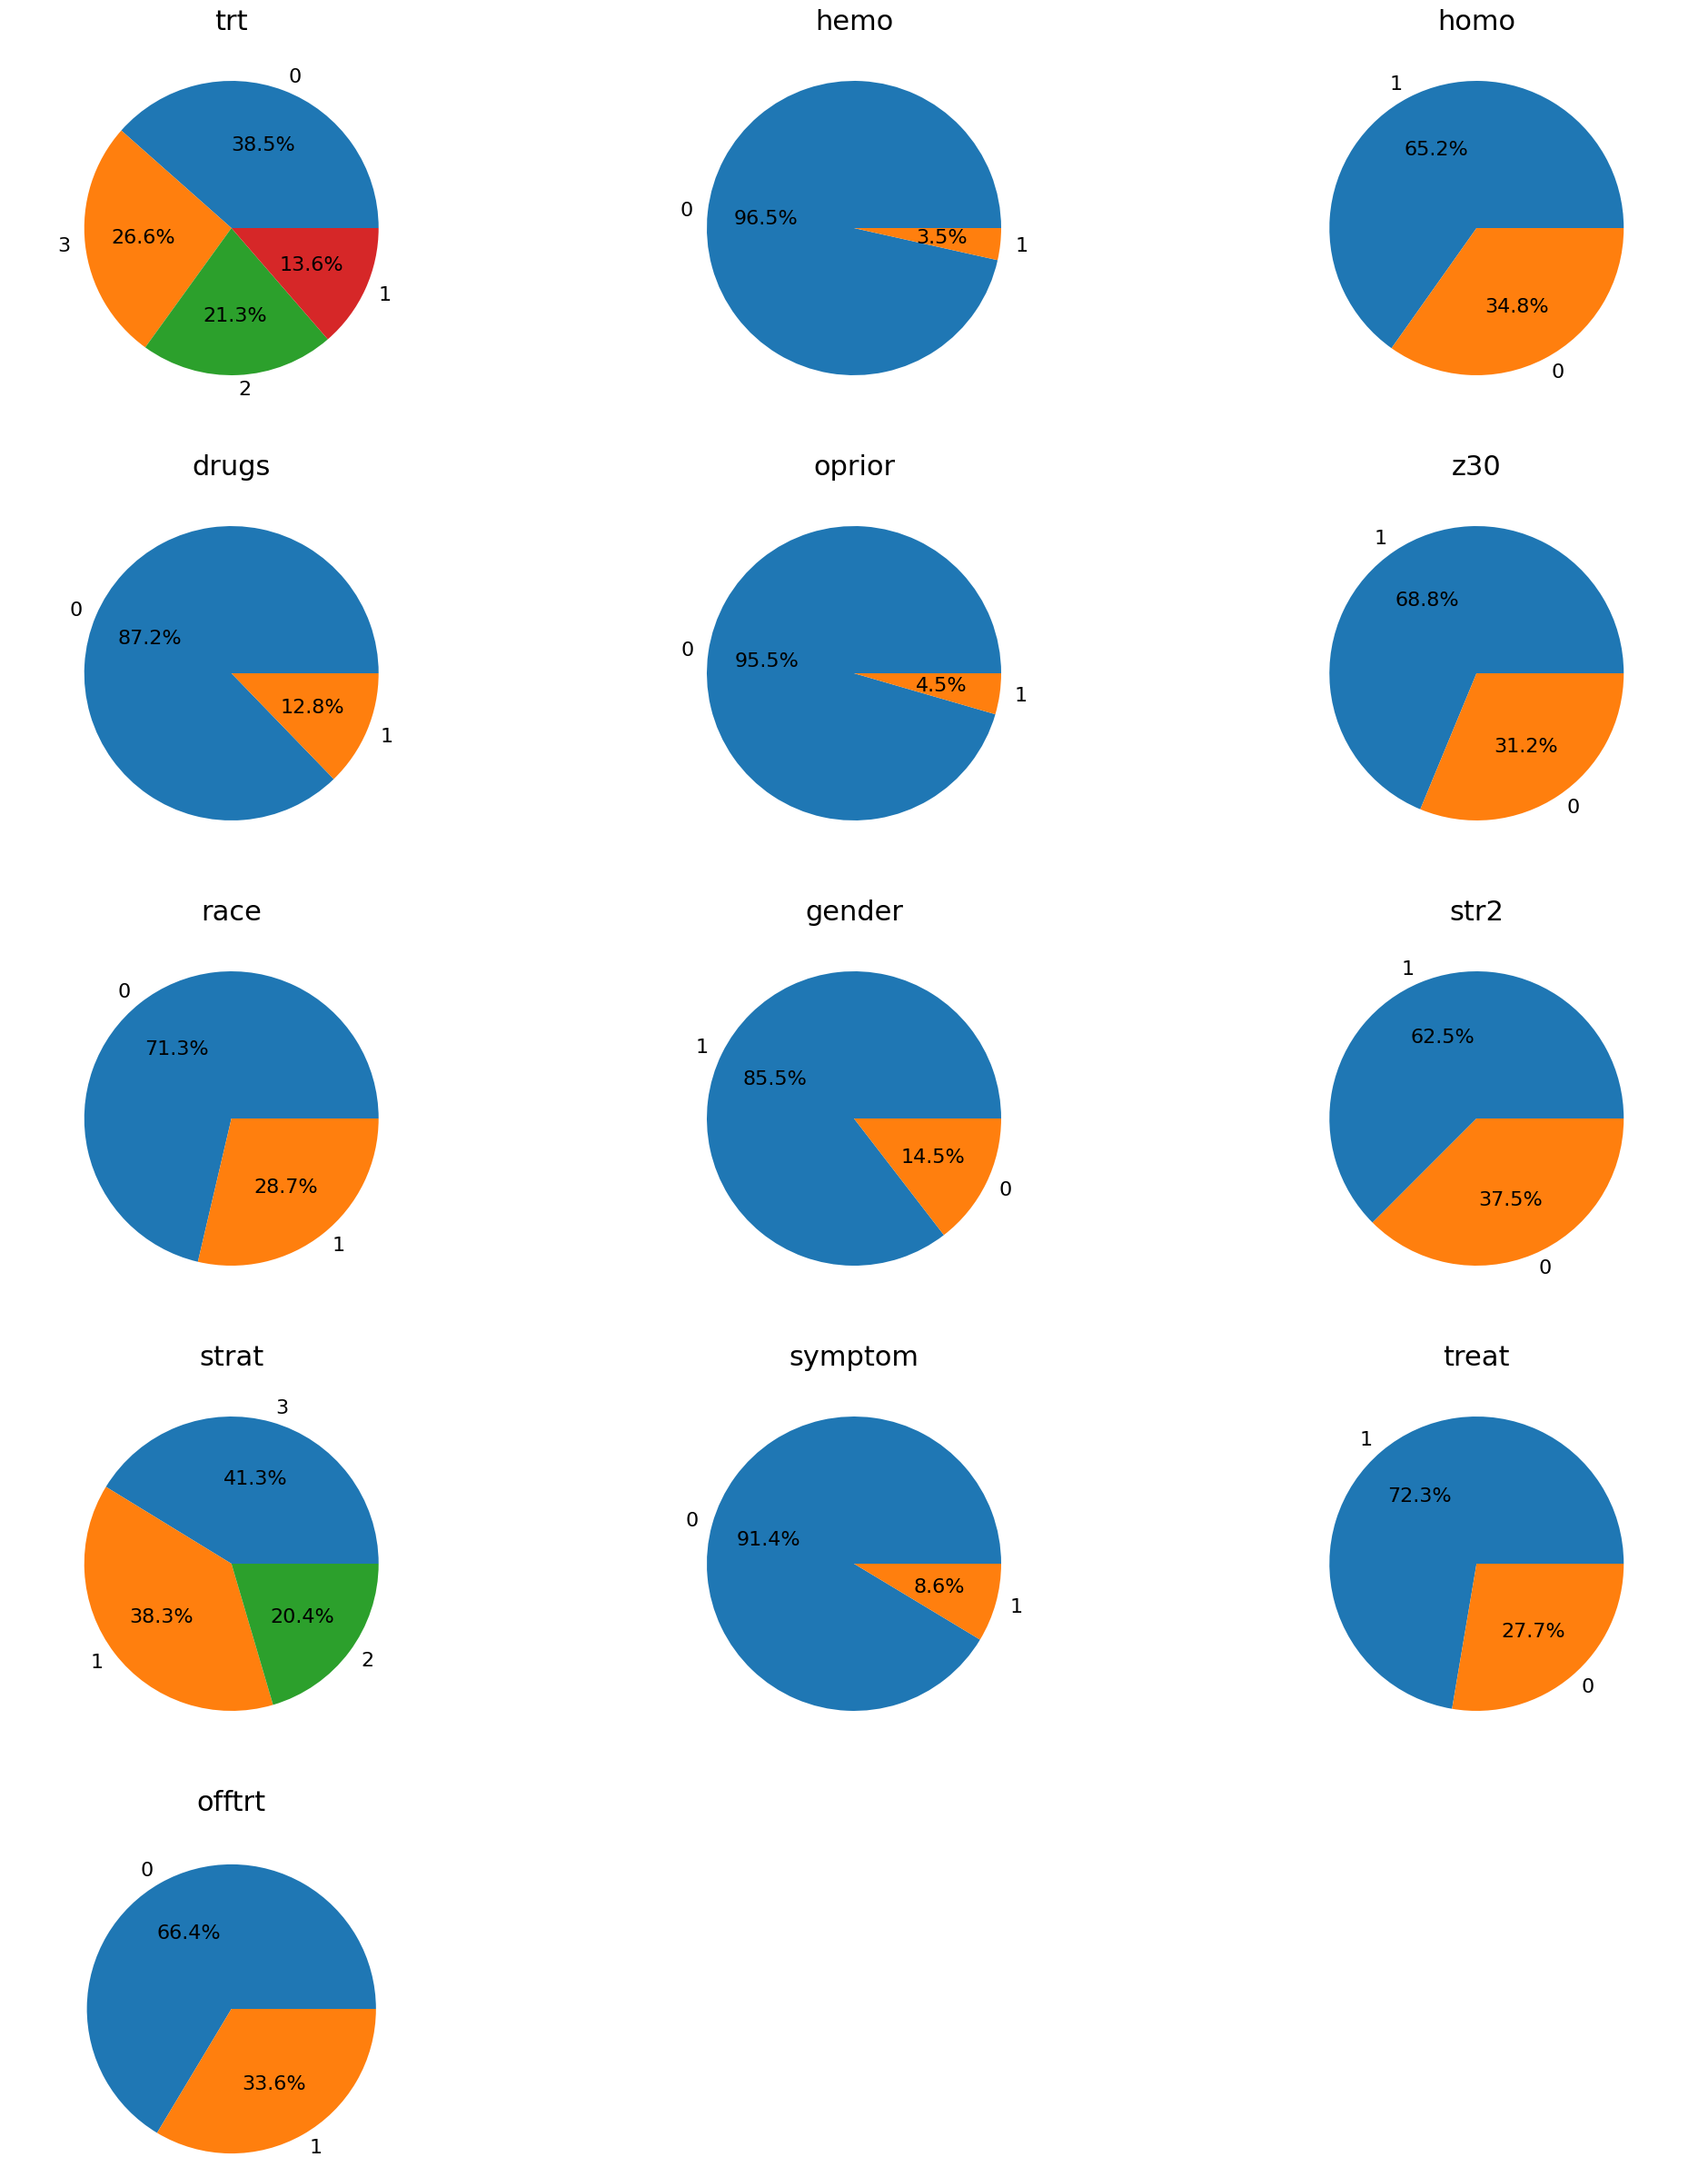

In [16]:
# Define kolom kategorikal untuk kebutuhan EDA
cat_columns = ["trt", "hemo", "homo", "drugs", "oprior", "z30", "race", "gender", "str2", "strat", "symptom", "treat", "offtrt"]

plt.figure(figsize=(24, 30))

# Iterasi melalui kolom kategori
for i, col in enumerate(cat_columns):
    plt.subplot(5, 3, i + 1)  # Plot grid 5x3
    df_eda[col].value_counts().plot.pie(
        autopct=lambda p: f'{p:.1f}%',  # Custom format untuk persentase
        radius=1.5,
        textprops={'fontsize': 16}  # Memperbesar font persentase
    )
    plt.title(col, fontsize=22, y=1.1)  # Memperbesar font judul dan menambahkan jarak
    plt.ylabel('')  # Hilangkan label y untuk estetika
    plt.axis('equal')  # Pastikan pie chart berbentuk lingkaran sempurna

plt.subplots_adjust(hspace=0.4, wspace=0.4) # Sesuaikan layout agar tidak tumpang tindih
plt.show()


**Insight :**

Berdasarkan gambar visualisasi pie chart di atas dapat disimpulkan sebagai berikut :

1. trt: 
    - Sebagian besar nilai adalah 0 (38.5%), menunjukkan banyak individu hanya mendapatkan pengobatan ZDV (Zidovudine) tanpa kombinasi dengan obat lain. diikuti dengan kategori trt 3 (26.6%), kategori trt 2 (21.3%), dan kategori trt 1 sebesar (13.6%)

2. hemo: 
    - Sebagian besar nilai adalah 0 (96.5%), menunjukkan sebagian besar individu tidak memiliki hemofilia, dan nilai 1 (3.5%) menunjukkan mereka yang memiliki hemofilia.

3. homo: 
    - Sebagian besar nilai adalah 0 (65.2%), menandakan individu tidak terlibat dalam aktivitas homoseksual, sementara nilai 1 (34.8%) menandakan individu yang terlibat.

4. drugs: 
    - Sebagian besar nilai adalah 0 (87.2%), menunjukkan individu tanpa riwayat penggunaan narkoba suntik, sedangkan nilai 1 (12.8%) menunjukkan sebaliknya.

5. opriori: 
    - Sebagian besar nilai adalah 0 (95.5%), menunjukkan sebagian besar individu tidak memiliki riwayat pengobatan antiretroviral non-ZDV sebelum terapi, dan nilai 1 (4.5%) menunjukkan mereka yang memiliki riwayat tersebut.

6. z30: 
    - Sebagian besar nilai adalah 0 (68.8%), menunjukkan individu tidak mengonsumsi ZDV dalam 30 hari sebelum terapi, sedangkan nilai 1 (31.2%) menunjukkan individu yang melakukannya.

7. race: 
    - Mayoritas nilai adalah 0 (71.3%), menunjukkan individu berkulit putih, sementara nilai 1 (28.7%) menunjukkan individu non-putih.

8. gender: 
    - Sebagian besar nilai adalah 0 (85.5%), menunjukkan individu perempuan, sedangkan nilai 1 (14.5%) menunjukkan laki-laki.

9. str2: 
    - Sebagian besar nilai adalah 0 (62.5%), menunjukkan kebanyakan individu belum pernah menggunakan terapi antiretroviral sebelumnya, sedangkan nilai 1 (37.5%) menunjukkan mereka yang sudah pernah menggunakannya.

10. strat: 
    - Sebagian besar nilai adalah 1 (41.3%), menunjukkan individu yang belum pernah memiliki pengalaman terapi antiretroviral sebelumnya, diikuti kategori 2 (38.3%)dan kategori 3 (20.4%)

11. symptom: 
    - Sebagian besar nilai adalah 0 (91.4%), menunjukkan individu tidak menunjukkan gejala penyakit, sedangkan nilai 1 (8.6%) menunjukkan gejala hadir.

12. treat: 
    - Sebagian besar nilai adalah 0 (72.3%), menunjukkan individu hanya menerima ZDV sebagai pengobatan utama, sedangkan nilai 1 (27.7%) menunjukkan mereka menerima pengobatan lain.

13. offtrt: 
    - Sebagian besar nilai adalah 0 (66.4%), menunjukkan sebagian besar individu tidak berhenti pengobatan sebelum 96 minggu, sementara nilai 1 (33.6%) menunjukkan mereka yang berhenti.



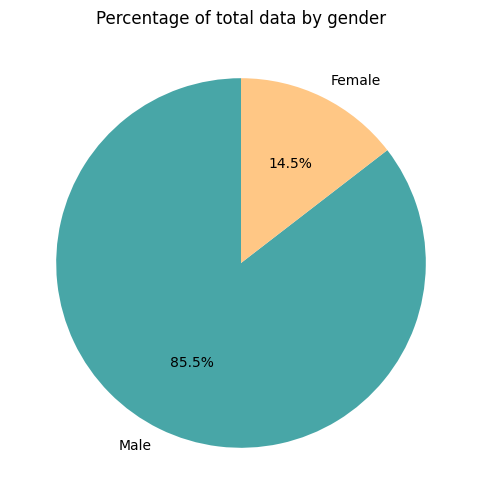

In [24]:
# Membuat pie chart distribusi gender
gender_counts = df['gender'].value_counts()
gender_labels = {0: 'Female', 1: 'Male'}
gender_counts.index = gender_counts.index.map(gender_labels)
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#48A6A7', '#FFC785'], startangle=90)
plt.title('Percentage of total data by gender')
plt.show()

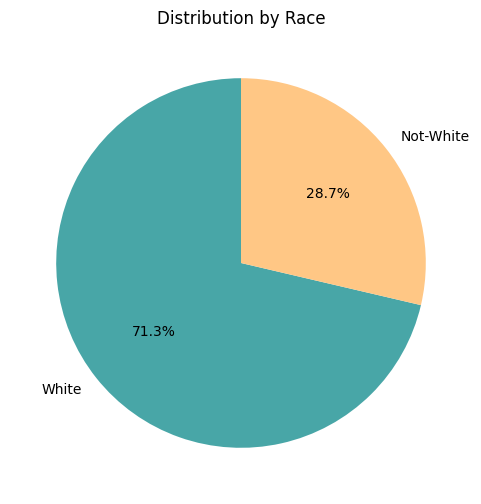

In [23]:
# Membuat pie chart distribusi gender
race_counts = df['race'].value_counts()
race_labels = {0: 'White', 1: 'Not-White'}
race_counts.index = race_counts.index.map(race_labels)
plt.figure(figsize=(6, 6))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', colors=['#48A6A7', '#FFC785'], startangle=90)
plt.title('Distribution by Race')
plt.show()

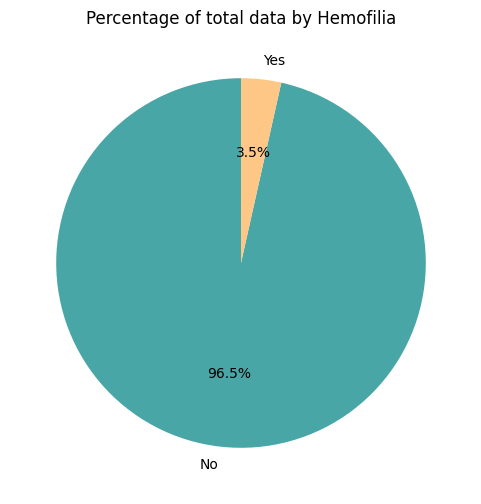

In [26]:
# Membuat pie chart distribusi gender
hemo_counts = df['hemo'].value_counts()
hemo_labels = {0: 'No', 1: 'Yes'}
hemo_counts.index = hemo_counts.index.map(hemo_labels)
plt.figure(figsize=(6, 6))
plt.pie(hemo_counts, labels=hemo_counts.index, autopct='%1.1f%%', colors=['#48A6A7', '#FFC785'], startangle=90)
plt.title('Percentage of total data by Hemofilia')
plt.show()

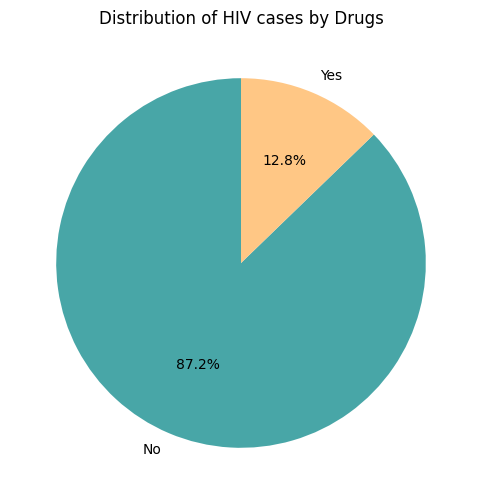

In [20]:
# Membuat pie chart distribusi gender
drugs_counts = df['drugs'].value_counts()
drugs_labels = {0: 'No', 1: 'Yes'}
drugs_counts.index = drugs_counts.index.map(drugs_labels)
plt.figure(figsize=(6, 6))
plt.pie(drugs_counts, labels=drugs_counts.index, autopct='%1.1f%%', colors=['#48A6A7', '#FFC785'], startangle=90)
plt.title('Distribution of HIV cases by Drugs')
plt.show()

## **4.4. Distribution of Infected**

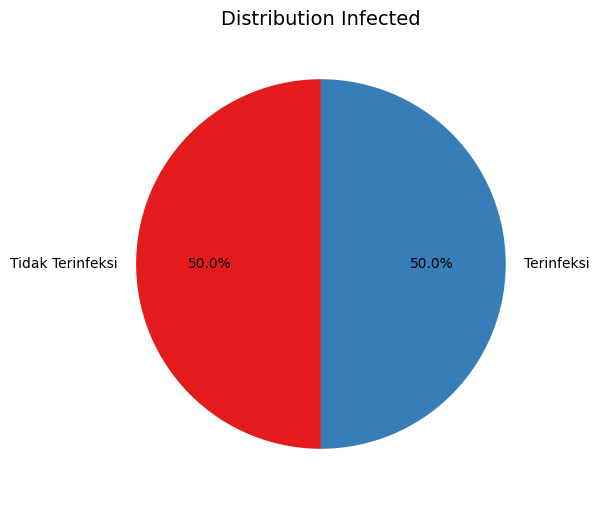

In [21]:
# Menghitung jumlah kategori di kolom 'infected'
infected_counts = df['infected'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 6)) 
plt.pie(
    infected_counts, 
    labels=['Tidak Terinfeksi', 'Terinfeksi'],  
    autopct='%1.1f%%', 
    startangle=90,  
    colors=sns.color_palette("Set1")  
)
plt.title('Distribution Infected', fontsize=14)  # Judul plot
plt.ylabel('')  # Menghilangkan label Y untuk estetika
plt.show()

**Insight :**

Berdasarkan pie chart di atas dapat dilihat bahwa dataset menunjukkan distribusi yang seimbang antara individu terinfeksi HIV dan tidak terinfeksi HIV dengan perbandingan 50% : 50%. Keseimbangan ini cukup bagus dan memberikan keuntungan dalam analisis data selnajutnya terutama dalam membangun model klasifikasi nantinya, karena model tidak akan bias terhadap salah satu kategori, sehingga meningkatkan akurasi dan keadilan pada hasil prediksi.

## **4.5. Correlation (Categorical) with Infection Status**

Untuk melihat hubungan / korelasi antara kategori fitur dengan kategori target akan digunakna metode Chi-squared karena kedua variabel tersebut bersifat kategorikal yang tidak memiliki urutan nilai yang bersifat kontinu, sehingga lebih cocok dianalisis dengan Chi-squared untuk mengevaluasi hubungan antar kategori.

**HIPOTESIS :**
- H0: Tidak ada hubungan yang signifikan antara kategori fitur dengan kategori target 
- H1: Ada hubungan yang signifikan antara kategori fitur dengan kategori target 

In [29]:
import pandas as pd
from scipy.stats import chi2_contingency

# Daftar kolom kategorikal
cat_col = ["trt", "hemo", "homo", "drugs", "oprior", "z30", "race", "gender", "str2", "strat", "symptom", "treat", "offtrt"]

# List untuk menyimpan hasil uji
results = []

# Mengiterasi setiap kolom dalam cat_col untuk membuat tabel kontingensi dan melakukan uji Chi-Squared
for col in cat_col:
    # Membuat tabel kontingensi
    contingency_table = pd.crosstab(df[col], df['infected'])
    
    # Uji Chi-Squared
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Menyimpan hasil uji ke dalam list
    results.append({"Kolom": col, "Chi-Squared": chi2, "P-Value": p_value, "DOF": dof})

# Membuat DataFrame dari hasil uji
results_df = pd.DataFrame(results)

# Menampilkan hasil
results_df



,Kolom,Chi-Squared,P-Value,DOF
0,trt,142.515252,1.084159e-30,3
1,hemo,24.326672,8.130544e-07,1
2,homo,1.650609,1.988760e-01,1
3,drugs,18.116979,2.077407e-05,1
4,oprior,71.311846,3.049992e-17,1
5,z30,2154.230995,0.000000e+00,1
6,race,23.914814,1.006939e-06,1
7,gender,21.027367,4.527696e-06,1
8,str2,2049.440488,0.000000e+00,1
9,strat,2369.124134,0.000000e+00,2


**Inksight :**

- Kolom 'trt': Berdasarkan hasil uji Chi-Squared, nilai Chi-squared sebesar 142,52 dengan p-value sangat kecil (1.08e-30) menunjukkan bahwa terdapat hubungan yang signifikan antara 'trt' dan 'infected'. Karena p-value jauh lebih kecil dari 0,05, kita menolak hipotesis nol (H0) yang menyatakan tidak ada hubungan. Dengan demikian, 'trt' dan 'infected' memiliki hubungan yang signifikan.

- Kolom 'hemo': Nilai Chi-squared sebesar 24,33 dengan p-value 8.13e-07 menunjukkan adanya hubungan yang signifikan antara 'hemo' dan 'infected'. Karena p-value lebih kecil dari 0,05, kita menolak hipotesis nol (H0) dan menyimpulkan bahwa keduanya memiliki hubungan yang signifikan.

- Kolom 'homo': Nilai Chi-squared sebesar 1,65 dengan p-value 0,199 menunjukkan bahwa tidak ada hubungan yang signifikan antara 'homo' dan 'infected'. Karena p-value lebih besar dari 0,05, kita gagal menolak hipotesis nol (H0) dan menyimpulkan bahwa 'homo' dan 'infected' tidak memiliki hubungan yang signifikan.

- Kolom 'drugs': Nilai Chi-squared sebesar 18,12 dengan p-value 2.08e-05 menunjukkan adanya hubungan yang signifikan antara 'drugs' dan 'infected'. Karena p-value lebih kecil dari 0,05, kita menolak hipotesis nol (H0) dan menyimpulkan bahwa keduanya memiliki hubungan yang signifikan.

- Kolom 'oprior': Nilai Chi-squared sebesar 71,31 dengan p-value 3.05e-17 menunjukkan hubungan yang sangat signifikan antara 'oprior' dan 'infected'. Karena p-value sangat kecil, kita menolak hipotesis nol (H0) dan menyimpulkan adanya hubungan yang signifikan.

- Kolom 'z30': Nilai Chi-squared sebesar 2154,23 dengan p-value 0,0 menunjukkan hubungan yang sangat signifikan antara 'z30' dan 'infected'. Karena p-value sangat kecil, kita menolak hipotesis nol (H0) dan menyimpulkan adanya hubungan yang signifikan.

- Kolom 'race': (Tambahkan hasil dan kesimpulan untuk 'race' setelah melakukan perhitungan yang sama seperti di atas)

- Kolom 'gender': (Tambahkan hasil dan kesimpulan untuk 'gender' setelah melakukan perhitungan yang sama seperti di atas)

- Kolom 'str2': (Tambahkan hasil dan kesimpulan untuk 'str2' setelah melakukan perhitungan yang sama seperti di atas)

- Kolom 'strat': (Tambahkan hasil dan kesimpulan untuk 'strat' setelah melakukan perhitungan yang sama seperti di atas)

- Kolom 'symptom': (Tambahkan hasil dan kesimpulan untuk 'symptom' setelah melakukan perhitungan yang sama seperti di atas)

- Kolom 'treat': (Tambahkan hasil dan kesimpulan untuk 'treat' setelah melakukan perhitungan yang sama seperti di atas)

- Kolom 'offtrt': Nilai Chi-squared sebesar 17,99 dengan p-value 2.22e-05 menunjukkan adanya hubungan yang signifikan antara 'offtrt' dan 'infected'. Karena p-value lebih kecil dari 0,05, kita menolak hipotesis nol (H0) dan menyimpulkan bahwa keduanya memiliki hubungan yang signifikan.


***Kesimpulan:***

Berdasarkan hasil uji Chi-Squared yang dilakukan pada berbagai kolom kategorikal terhadap kolom 'infected', dapat disimpulkan bahwa sebagian besar kolom memiliki hubungan yang signifikan dengan status 'infected', sementara beberapa lainnya tidak menunjukkan hubungan yang signifikan.
- Kolom yang memiliki hubungan signifikan dengan 'infected' antara lain: 'trt', 'hemo', 'drugs', 'oprior', 'z30', dan 'offtrt'. Nilai Chi-squared untuk kolom-kolom ini sangat tinggi dengan p-value yang sangat kecil (lebih kecil dari 0,05), yang menunjukkan bahwa ada hubungan yang kuat antara masing-masing kolom tersebut dengan status 'infected'. Ini berarti faktor-faktor dalam kolom-kolom tersebut mempengaruhi atau terkait erat dengan status infeksi.
- Kolom yang tidak memiliki hubungan signifikan dengan 'infected' adalah 'homo', dengan nilai Chi-squared yang relatif kecil dan p-value yang lebih besar dari 0,05. Hal ini menunjukkan bahwa tidak ada cukup bukti untuk menganggap adanya hubungan antara kolom 'homo' dengan status 'infected'.

Dengan demikian, kolom-kolom yang menunjukkan hubungan signifikan dengan 'infected' dapat menjadi faktor penting dalam analisis lebih lanjut dan pengembangan model prediksi.

# **5. Feature Engineering**


In [23]:
# Melakukan copy data
df_fe = df.copy()

Kode diatas  betujuan untuk mencegah perubahan langsung pada DataFrame asli 

## **5.1. Split between X (features) and y (Target)**

Proses ini dilakukan untuk memisahkan fitur (variabel independen) yang digunakan sebagai input (X) dari target (variabel dependen) yang akan diprediksi (y). Dengan membedakan keduanya, kita dapat melatih model untuk memahami hubungan antara fitur dan target sehingga dapat menghasilkan prediksi yang akurat

In [24]:
# Feature / Variabel Dependen
X= df_fe.drop('infected', axis= 1)

# Target / Variabel Independen
y= df_fe['infected']

Kode di atas digunakan untuk memisahkan dataset menjadi fitur dan target. X berisi semua kolom kecuali kolom 'infected' / fitur independen untuk model, Sedangkan y berisi kolom 'infected' yang merupakan kolom target / variabel dependen yang ingin diprediksi

## **5.2. Split between Train-set and Test-set**

Pembagian data antara data latih dan data uji penting dilakukan untuk mengevaluasi performa dari model yang akan dibuat. Train set digunakan untuk melatih model, sedangkkan test set digunakan untuk menguji kemampuan model pada data yang sebelumnya belum pernah dilihat/dipelajari model. Hal ini membantu untuk menghindari overfitting serta memastikan model dapat bekerja dengan baik pada data baru.

In [25]:
# Membagi dataset menjadi data pelatihan dan data pengujian
# test_size=0.2 berarti 20% data digunakan untuk pengujian dan 80% untuk pelatihan
# random_state=42 memastikan pembagian data hasilnya sama setiap kali dijalankan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan dimensi data pelatihan (X_train) dan target pelatihan (y_train)
print(f' Jumlah data X_train :', X_train.shape)
print(f' Jumlah data y_train :', y_train.shape)

# Menampilkan dimensi data pengujian (X_test) dan target pengujian (y_test)
print(f' Jumlah data X_test :', X_test.shape)
print(f' Jumlah data y_test :', y_test.shape)

 Jumlah data X_train : (24000, 22)
 Jumlah data y_train : (24000,)
 Jumlah data X_test : (6000, 22)
 Jumlah data y_test : (6000,)


**Insight :**

Dataset berhasil dibagi dengan jumlah data X_train 24.000 sampel dan 22 fitur, sedangkan y_train memiliki 24.000 label target. Untuk data pengujian, X_test berjumlah 6.000 sampel dengan 22 fitur, dan y_test berisi 6.000 label target

## **5.3. Check Cardinality**

In [26]:
# Daftar kolom kategori
obj_col = X_train[["trt", "hemo", "homo", "drugs", "oprior", "z30", "race", "gender", "str2", "strat", "symptom", "treat", "offtrt"]]

# Membuat daftar kosong untuk menyimpan informasi cardinality
daftar_cardinality = []

# Loop untuk menghitung jumlah nilai unik pada setiap kolom
for kolom in obj_col:
    jumlah_nilai_unik = len(X_train[kolom].unique())
    daftar_cardinality.append({"Kolom": kolom, "Cardinality": jumlah_nilai_unik})

# Mengubah daftar menjadi DataFrame
tabel_cardinality = pd.DataFrame(daftar_cardinality)

# Menampilkan hasil
tabel_cardinality

,Kolom,Cardinality
0,trt,4
1,hemo,2
2,homo,2
3,drugs,2
4,oprior,2
5,z30,2
6,race,2
7,gender,2
8,str2,2
9,strat,3


**Insight :**

 Dari hasil analisis tidak ada kolom yang memiliki kardinalitas tinggi dalam dataset ini, sehingga tidak diperlukan teknik khusus untuk menangani variabel dengan jumlah kategori yang sangat banyak.

## **5.4. Handling Outliers**

Cara Handle Ouliers
1. **Trimming Outliers** >> Menghapus Outliers >> dapat menghilangkan informasi
    - Bisa dilakukan ketika perbandingan antara upper boundary, lower boundary, nilai minimum, dan nilai maksimum value pada kolom tersebut kurang meyakinkan. Misal ada umur 0 tahun.

2. **Retaining Outliers** >>  Mengganti outlier dengan nilai kosong
 dan lanjutkan dengan teknik imputasi data yang hilang
    - Bisa dilakukan ketika perbandingan antara upper boundary, lower boundary, nilai minimum, dan nilai maksimum value pada kolom tersebut masih make sense dan tidak terlalu jauh dari mean value nya. Seperti pace masih di range 0 - 100.

3. **Capping (Winsorizing/Censoring)** >> Membatasi distribusi variabel pada nilai maksimum dan/atau minimum >> tidak akan kehilangan informasi >> mengubah atau merusak pola atau bentuk distribusi data asli
    - Cara terakhir bila keduanya tidak masuk kriteria.

In [27]:
# Define kolom kategorical dan numerical karena semua kolom sudah ter-encode
num_cols = ["time", "age", "wtkg", "karnof", "preanti", "cd40", "cd420", "cd80", "cd820"]
cat_cols = ["trt", "hemo", "homo", "drugs", "oprior", "z30", "race", "gender", "str2", "strat", "symptom", "treat", "offtrt"]


In [28]:
# Menghitung skewness dan mengklasifikasikan distribusinya
list_item = []

for col in num_cols:  # Pastikan num_cols adalah daftar nama kolom numerik
    skewness = round(X_train[col].skew(), 1)  # Hitung skewness untuk kolom
    distribution = 'normal' if -0.5 <= skewness <= 0.5 else 'skewed'  # Klasifikasi distribusi
    list_item.append([col, skewness, distribution])

# Menampilkan hasil distribusi skewness kolom dalam DataFrame
skew = pd.DataFrame(list_item, columns=['nama kolom', 'nilai skewness', 'distribution'])
skew

,nama kolom,nilai skewness,distribution
0,time,-0.5,normal
1,age,0.2,normal
2,wtkg,1.2,skewed
3,karnof,-1.2,skewed
4,preanti,1.1,skewed
5,cd40,0.7,skewed
6,cd420,0.7,skewed
7,cd80,1.6,skewed
8,cd820,1.2,skewed


**Insight :**

Dari hasil di atas, dapat dilihat bahwa hampir semua data pada kolom numerical tidak terdistribusi dengan normal kecuali kolom 'time' dan kolom 'age'. Dimana kolom yang terdistribusi tidak normal berjumlah 7 kolom, 1 kolom terindikasi skew negatif dan sisanya skew positif. Selanjutnya, akan dilihat batas atas dan batas bawah dan presentase outlier pada masing-masing kolom.

In [29]:
# Menentukan batas atas, batas bawah, dan persentase outliers untuk setiap kolom
column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

# Perhitungan batas dan persentase outliers berdasarkan distribusi skewness
for row in range (0, len(skew)):
  col = skew['nama kolom'][row]
  if skew['distribution'][row] == 'skewed':
    # Jika distribusi skewed, hitung dengan IQR
    IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
    lower_boundary = X_train[col].quantile(0.25) - (IQR * 3)
    upper_boundary = X_train[col].quantile(0.75) + (IQR * 3)
  else:
    # Jika normal, hitung dengan nilai mean dan std
    lower_boundary = X_train[col].mean() - 3* X_train[col].std()
    upper_boundary = X_train[col].mean() + 3* X_train[col].std()

  # Menambahkan hasil ke dalam list
  column.append(col)
  lower_bound.append(lower_boundary)
  upper_bound.append(upper_boundary)
  totout = ((len(X_train[X_train[col] > upper_boundary]) / len(X_train) * 100) +
            (len(X_train[X_train[col] < lower_boundary]) / len(X_train) * 100))
  percent_total_outlier.append(totout)

# Menyusun hasil perhitungan dalam DataFrame
outliers = pd.DataFrame({
    'column': column,
    'upper_boundary': [round(upper_bound, 2) for upper_bound in upper_bound],
    'lower_boundary': [round(lower_bound, 2) for lower_bound in lower_bound],
    'percentage_total_outlier': [round(percent_total_outlier, 2) for percent_total_outlier in percent_total_outlier]
})

outliers

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,time,1802.20,-72.39,0.00
1,age,55.43,13.15,0.59
2,wtkg,120.00,29.00,0.68
3,karnof,130.00,60.00,0.00
4,preanti,2382.00,-1783.00,0.01
5,cd40,859.00,-240.00,0.00
6,cd420,1122.00,-285.00,0.00
7,cd80,2840.00,-884.00,0.61
8,cd820,2378.00,-646.00,0.30


**Insight :**

Berdasarkan hasil di atas, terdapat lima kolom yang mengandung outlier, yaitu age, wtkg, preanti, cd80, dan cd820, berdasarkan persentase total outlier. Berdasarkan analisis terhadap lima algoritma yang akan digunakan untuk pemodelan (KNN, SVC, Decision Tree, Random Forest, dan XGBoost), beberapa algoritma yang akan digunakan untuk modeling sensitive terhadap outliers seperti K-Nearest Neighbors (KNN) dan Support Vector Classifier (SVC). Oleh karena itu, untuk meminimalkan kesalahan akibat outliers dan menjaga informasi penting lainnya dalam data, outliers akan ditangani menggunakan metode capping untuk memastikan distribusi data tetap terjaga tanpa kehilangan informasi signifikan.

In [30]:
# Membuat Winsorizer untuk beberapa variabel
winsoriser = Winsorizer(
    capping_method='iqr',       
    tail='right',               
    fold=3,                     
    variables=["age", "wtkg", "preanti", "cd40", "cd80", "cd820"],  # Daftar fitur
    missing_values='ignore'     
)
# Menerapkan Winsorizer pada data pelatihan untuk menangani outliers
X_train = winsoriser.fit_transform(X_train)

# Menerapkan model yang sama pada data pengujian
X_test = winsoriser.transform(X_test)

## **5.5. Feature Selection**

Berdasarkan hasil analisis distribusi pada tahap sebelumnya dapat dilihat bahwa tidak semua data terdistribusi dengan normal sehingga metode yang cocok untuk melakukan feature selection pada kolom kategorical maupun numerical adalah Kendall's Tau karena metode ini mampu mengukur hubungan monotonik antara dua fitur tanpa memerlukan asumsi distribusi normal. Metode ini juga dapat digunakan untuk fitur biner, numerik, maupun kategorikal ordinal, seperti pada fitur-fitur dalam dataset.

In [31]:
# Feature selection categorical columns
p_values = []
interpretasi = []
cols = []

for col in X_train[cat_cols].columns:
  corr_coef, p_value = kendalltau(X_train[cat_cols][col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,trt,ada korelasi
1,hemo,ada korelasi
2,homo,ga ada korelasi
3,drugs,ada korelasi
4,oprior,ada korelasi
5,z30,ada korelasi
6,race,ada korelasi
7,gender,ada korelasi
8,str2,ada korelasi
9,strat,ada korelasi


**Insight :**

Berdasarkan hasil analisis hubungan kolom numerical dengan target 'infected', hanya terdapat satu kolom yang tidak memiliki korelasi dengan kolom target, yaitu kolom 'homo'. Hal ini menunjukkan bahwa keterlibatan atau ketidakterlibatan seseorang dalam aktivitas homoseksual tidak memengaruhi kemungkinan individu tersebut terinfeksi HIV atau tidak. Karena tidak memiliki korelasi maka pada tahap selanjutnya kolom 'homo' akan dihapus.

In [32]:
# Feature selection numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train[num_cols].columns:
  corr_coef, p_value = kendalltau(X_train[num_cols][col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,time,ada korelasi
1,age,ada korelasi
2,wtkg,ada korelasi
3,karnof,ada korelasi
4,preanti,ada korelasi
5,cd40,ada korelasi
6,cd420,ada korelasi
7,cd80,ga ada korelasi
8,cd820,ada korelasi


**Insight :**

Berdasarkan hasil analisis hubungan kolom numerical dengan target 'infected', hanya terdapat satu kolom yang tidak memiliki korelasi dengan kolom target, yaitu kolom 'cd80'. Hal ini menunjukkan bahwa jumlah CD8(sel kekebalan tubuh) pada awal pengobatan  tidak memengaruhi kemungkinan individu tersebut terinfeksi HIV atau tidak. Karena tidak memiliki korelasi maka pada tahap selanjutnya kolom 'cd80' akan dihapus.

In [33]:
# Menghapus kolom 'homo' dan 'cd80' dari X_train dan X_test
X_train_final = X_train.drop(columns=['homo', 'cd80'], axis=1)
X_test_final = X_test.drop(columns=['homo', 'cd80'], axis=1)

In [34]:
# Melihat nama kolom yang sudah final
X_train_final.columns

Index(['time', 'trt', 'age', 'wtkg', 'hemo', 'drugs', 'karnof', 'oprior',
       'z30', 'preanti', 'race', 'gender', 'str2', 'strat', 'symptom', 'treat',
       'offtrt', 'cd40', 'cd420', 'cd820'],
      dtype='object')

***Kesimpulan Feature Engineering :***

Berdasarkan hasil analisis keseluruhan pada tahap feature engineering, yang meliputi pemisahan data menjadi X dan y, pembagian fitur menjadi kategorikal dan numerikal, penanganan outliers, serta seleksi fitur, diharapkan data menjadi lebih siap untuk dilakukan proses pemodelan.

Selain itu, pada dataset ini tidak menggunakan PCA dalam analisis karena jumlah kolom numerikal relatif sedikit  hanya 8 fitur sehingga penerapan PCA dianggap tidak memberikan manfaat signifikan dalam mengurangi dimensi atau meningkatkan efisiensi model.

# **6. Model Definition**

Sebelum membangun pipeline, diterapkan pendekatan khusus seperti MinMaxScaler untuk menstandardisasi skala fitur numerikal, serta SMOTENC untuk menangani ketidakseimbangan data pada fitur kategorikal dan numerikal secara efektif. 

Berikut merupakan alasan kenapa memilih metode MinMaxscaler untuk melakukan scaling, dan SMOTENC untuk menangani data imbalance :

1. MinMaxScaler digunakan untuk memastikan semua fitur numerikal berada dalam rentang yang konsisten 0 dan 1 untuk menjaga distribusi data asli, kemudian teknik ini dapat meningkatkan performa algoritma yang sensitif terhadap skala seperti KNN dan SVM. Namun, untuk algoritma seperti Decision Tree, Random Forest, dan XGBoost, scaling tidak selalu diperlukan karena algoritma ini tidak sensitif terhadap skala fitur.

2. SMOTENC dipilih untuk mengatasi ketidakseimbangan data pada kolom fitur yang melibatkan kombinasi fitur numerikal dan kategorikal. Teknik ini bekerja dengan mempertimbangkan fitur kategorikal secara eksplisit untuk memastikan data sintetis sehingga dapat menjaga karakteristik dataset. Penggunaan SMOTENC dianggap relevan karena sebagian besar fitur bertipe kategorikal dalam dataset dan memiliki distribusi yang tidak seimbang.

In [35]:
# Melihat indeks dan nama kolom 
for idx, col in enumerate(X_train_final.columns):
    print(f"Indeks: {idx}, Kolom: {col}")

Indeks: 0, Kolom: time
Indeks: 1, Kolom: trt
Indeks: 2, Kolom: age
Indeks: 3, Kolom: wtkg
Indeks: 4, Kolom: hemo
Indeks: 5, Kolom: drugs
Indeks: 6, Kolom: karnof
Indeks: 7, Kolom: oprior
Indeks: 8, Kolom: z30
Indeks: 9, Kolom: preanti
Indeks: 10, Kolom: race
Indeks: 11, Kolom: gender
Indeks: 12, Kolom: str2
Indeks: 13, Kolom: strat
Indeks: 14, Kolom: symptom
Indeks: 15, Kolom: treat
Indeks: 16, Kolom: offtrt
Indeks: 17, Kolom: cd40
Indeks: 18, Kolom: cd420
Indeks: 19, Kolom: cd820


## **6.1. Column Transformer**

In [36]:
# Indeks fitur kategorik
cat_features = [1, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16]

# Indeks fitur numerik
num_features = [0, 3, 6, 9, 17, 18, 19]  


# Preprocessor untuk scaler hanya pada kolom numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_features)
    ],
    remainder='passthrough'  # Biarkan kolom lainnya
)

## **6.2. Make Pipeline**

Untuk memastikan bahwa model yang digunakan untuk klasifikasi dapat menangani data yang tidak seimbang dengan baik dan memberikan performa optimal, diperlukan pipeline yang terintegrasi. Berikut adalah pipeline yang dirancang untuk menggabungkan preprocessing, penanganan ketidakseimbangan data dengan SMOTE berdasarkan 5 algoritma yang telah ditetapkan yaitu, K-Nearest Neighbors, Support Vector Classifier, Decision Tree, Random Forest, dan XGBoost

In [37]:
#Making pipeline for K-Nearest Neighbors
pipe_knn = ImbPipeline([
    ('scaler', preprocessor),
    ('smote', SMOTENC(categorical_features=cat_features,
                      random_state=42)),
    ('classifier', KNeighborsClassifier())
])

#Making pipeline for Support Vector Classifier
pipe_svc = ImbPipeline([
    ('scaler', preprocessor),
    ('smote', SMOTENC(categorical_features=cat_features,
                      random_state=42)),
    ('classifier', SVC())
])

#Making pipeline for Decision Tree
pipe_dtc = ImbPipeline([
    ('scaler', preprocessor),
    ('smote', SMOTENC(categorical_features=cat_features,
                      random_state=42)),
    ('classifier', DecisionTreeClassifier())
])

#Making pipeline for Random Forest Classifier
pipe_rfc = ImbPipeline([
    ('scaler', preprocessor),
    ('smote', SMOTENC(categorical_features=cat_features,
                      random_state=42)),
    ('classifier', RandomForestClassifier())
])

#Making pipeline for XGBoost Classifier
pipe_xgb = ImbPipeline([
    ('scaler', preprocessor),
    ('smote', SMOTENC(categorical_features=cat_features,
                      random_state=42)),
    ('classifier', XGBClassifier())
])

Berdasarkan hasil di atas, dapat dilihat bahwa Pipeline untuk masing-masing algoritma telah berhasil dibuat

# **7. Model Training (Base Model Evaluation)**

**Justification**

Dalam kasus prediksi infeksi HIV, evaluasi model dilakukan dengan mempertimbangkan keseimbangan antara data training dan testing, dengan fokus utama pada Recall dan F1-Score sebagai metrik evaluasi.

Alasan Fokus pada Recall dan F1-Score:
- Konsekuensi False Negative yang Tinggi:
Jika individu terinfeksi HIV tetapi model memprediksi tidak terinfeksi (False Negative), dampaknya sangat serius karena individu tersebut tidak akan menerima penanganan yang diperlukan secara tepat waktu sehingga meningkatkan risiko penularan lebih lanjut.

- Prioritas pada kasus ini adalah untuk mendeteksi kasus positif:
Dalam skenario kesehatan masyarakat  mendeteksi sebanyak mungkin individu yang benar-benar terinfeksi menjadi prioritas utama. Meskipun ada risiko menghasilkan beberapa False Positive, yang lebih penting adalah memastikan bahwa individu yang membutuhkan perawatan dapat teridentifikasi dan segera mendapatkan penanganan yang tepat.

## **7.1. K-Nearest Neighbors Model**

In [27]:
pipe_knn.fit(X_train_final, y_train)
print('Training Score: ',round(pipe_knn.score(X_train_final, y_train),4))
print('Testing Score: ', round(pipe_knn.score(X_test_final, y_test),4))

NameError: name 'pipe_knn' is not defined

In [39]:
y_knn_pred = pipe_knn.predict(X_test_final)

target = ['Not Infected', 'Infected']
print(classification_report(y_test, y_knn_pred, target_names = target))

              precision    recall  f1-score   support

Not Infected       0.58      0.59      0.59      2957
    Infected       0.60      0.59      0.59      3043

    accuracy                           0.59      6000
   macro avg       0.59      0.59      0.59      6000
weighted avg       0.59      0.59      0.59      6000



In [40]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_knn,
                                    X_train_final, 
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.59197408 0.60248447 0.59909191]
F1 Score - Mean - Cross Validation :  0.5978501543115211
F1 Score - Std - Cross Validation  :  0.0043797694533236325
F1 Score - Range of Test-Set       :  0.5934703848581975 - 0.6022299237648447


**Insight Model K-Nearest Neighbors:**

- Ketidakseimbangan Model: Terjadi ketidakseimbangan antara Training Score (0.73) yang lebih tinggi dan Testing Score (0.5902), dimana ini berarti model overfitting yang menandakan bahwa model bekerja dengan sangat baik pada data pelatihan tetapi kurang mampu menangani data yang belum pernah dilihat sebelumnya, seperti data uji
- Recall "Infected": Recall untuk "Infected" adalah 0.59, yang berarti 59% kasus positif terdeteksi, menunjukkan kemampuan model mampu mendeteksi sebagian besar kasus terinfeksi.
- F1-Score: F1-Score rata-rata uji adalah 0.59, menunjukkan keseimbangan antara Precision dan Recall.
- F1-Score Cross-Validation: F1-Score rata-rata Cross-Validation adalah 0.5978, dengan rentang 0.5934–0.6022

## **7.2. Support Vector Classifier Model**

In [41]:
pipe_svc.fit(X_train_final, y_train)
print('Training Score: ',round(pipe_svc.score(X_train_final, y_train),4))
print('Testing Score: ', round(pipe_svc.score(X_test_final, y_test),4))

Training Score:  0.6378
Testing Score:  0.6368


In [42]:
y_svc_pred = pipe_svc.predict(X_test_final)

target = ['Not Infected', 'Infected']
print(classification_report(y_test, y_svc_pred, target_names = target))

              precision    recall  f1-score   support

Not Infected       0.65      0.57      0.61      2957
    Infected       0.63      0.70      0.66      3043

    accuracy                           0.64      6000
   macro avg       0.64      0.64      0.63      6000
weighted avg       0.64      0.64      0.64      6000



In [43]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_svc,
                                     X_train_final, 
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.66023928 0.66635393 0.66343042]
F1 Score - Mean - Cross Validation :  0.6633412132475073
F1 Score - Std - Cross Validation  :  0.002497092297430567
F1 Score - Range of Test-Set       :  0.6608441209500767 - 0.6658383055449378


**Insight Model Support Vector Classifier:**

- Ketidakseimbangan Model: Model ini dianggap seimbang antara Training Score (0.6378) yang lebih tinggi dan Testing Score (0.6368), yang menunjukkan bahwa model memiliki kemampuan yang hampir sama pada data pelatihan dan data uji, mengindikasikan bahwa model tidak mengalami overfitting dan dapat menggeneralisasi dengan baik
- Recall "Infected": Recall untuk "Infected" adalah 0.70, yang berarti 70% kasus positif terdeteksi, menunjukkan kemampuan model mampu mendeteksi sebagian besar kasus terinfeksi. menunjukkan bahwa model cukup baik dalam mendeteksi individu yang terinfeksi meskipun terjadi underfitting.
- F1-Score: F1-Score rata-rata uji adalah 0.66, menunjukkan keseimbangan antara Precision dan Recall.
- F1-Score Cross-Validation: F1-Score rata-rata Cross-Validation adalah 0.6633, dengan rentang 0.6608–0.6658

## **7.3. Decision Tree Model**

In [44]:
pipe_dtc.fit(X_train_final, y_train)
print('Training Score: ',round(pipe_dtc.score(X_train_final, y_train),4))
print('Testing Score: ', round(pipe_dtc.score(X_test_final, y_test),4))

Training Score:  1.0
Testing Score:  0.5602


In [45]:
y_dtc_pred = pipe_dtc.predict(X_test_final)

target = ['Not Infected', 'Infected']
print(classification_report(y_test, y_dtc_pred, target_names = target))

              precision    recall  f1-score   support

Not Infected       0.55      0.56      0.56      2957
    Infected       0.57      0.56      0.56      3043

    accuracy                           0.56      6000
   macro avg       0.56      0.56      0.56      6000
weighted avg       0.56      0.56      0.56      6000



In [46]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_dtc,
                                     X_train_final, 
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.5563531  0.56656308 0.56493103]
F1 Score - Mean - Cross Validation :  0.5626157390002272
F1 Score - Std - Cross Validation  :  0.0044781949731074085
F1 Score - Range of Test-Set       :  0.5581375440271198 - 0.5670939339733346


**Insight Model Decision Tree:**
- Ketidakseimbangan Model: Terjadi ketidakseimbangan antara Training Score (1.0) yang sangat tinggi dan Testing Score (0.5565), yang menunjukkan bahwa model mengalami overfitting, menunjukkan bahwa model bekerja dengan sangat baik pada data pelatihan namun kurang mampu menangani data uji..
- Recall "Infected": Recall untuk "Infected" adalah 0.55, yang berarti 55% kasus positif terdeteksi, menunjukkan bahwa model dapat mendeteksi sebagian besar kasus terinfeksi
- F1-Score: F1-Score rata-rata uji adalah 0.56, mencerminkan keseimbangan yang cukup baik antara Precision dan Recall 
- F1-Score Cross-Validation: F1-Score rata-rata Cross-Validation adalah 0.5637, dengan rentang 0.5609–0.5665

## **7.4. Random Forest Classifier Model**

In [47]:
pipe_rfc.fit(X_train_final, y_train)
print('Training Score: ',round(pipe_rfc.score(X_train_final, y_train),4))
print('Testing Score: ', round(pipe_rfc.score(X_test_final, y_test),4))

Training Score:  1.0
Testing Score:  0.634


In [48]:
y_rfc_pred = pipe_rfc.predict(X_test_final)

target = ['Not Infected', 'Infected']
print(classification_report(y_test, y_rfc_pred, target_names = target))

              precision    recall  f1-score   support

Not Infected       0.63      0.62      0.63      2957
    Infected       0.64      0.64      0.64      3043

    accuracy                           0.63      6000
   macro avg       0.63      0.63      0.63      6000
weighted avg       0.63      0.63      0.63      6000



In [49]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_rfc,
                                     X_train_final, 
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.64422604 0.64071411 0.63859993]
F1 Score - Mean - Cross Validation :  0.6411800264665456
F1 Score - Std - Cross Validation  :  0.0023203605412486557
F1 Score - Range of Test-Set       :  0.638859665925297 - 0.6435003870077942


**Insight Model Random Forest Classifier:**

- Ketidakseimbangan Model: Model menunjukkan overfitting, dengan Training Score (1.0) yang jauh lebih tinggi dibandingkan dengan Testing Score (0.6357), menunjukkan bahwa model bekerja dengan sangat baik pada data pelatihan namun kurang mampu menangani data uji.
- Recall "Infected": Recall untuk "Infected" adalah 0.64, yang berarti 64% kasus positif terdeteksi, menunjukkan bahwa model cukup baik dalam mendeteksi individu yang terinfeksi meskipun terjadi overfitting.
- F1-Score: F1-Score rata-rata uji adalah 0.64, yang masih menunjukkan keseimbangan antara Precision dan Recall
- F1-Score Cross-Validation: F1-Score rata-rata Cross-Validation adalah 0.6434, dengan rentang 0.6408–0.6459

## **7.5. XGB Classifier Model**

In [50]:
pipe_xgb.fit(X_train_final, y_train)
print('Training Score: ',round(pipe_xgb.score(X_train_final, y_train),4))
print('Testing Score: ', round(pipe_xgb.score(X_test_final, y_test),4))

Training Score:  0.8139
Testing Score:  0.619


In [51]:
y_xgb_pred = pipe_xgb.predict(X_test_final)

target = ['Not Infected', 'Infected']
print(classification_report(y_test, y_xgb_pred, target_names = target))

              precision    recall  f1-score   support

Not Infected       0.62      0.60      0.61      2957
    Infected       0.62      0.64      0.63      3043

    accuracy                           0.62      6000
   macro avg       0.62      0.62      0.62      6000
weighted avg       0.62      0.62      0.62      6000



In [52]:
#Cross Validation

f1_train_cross_val = cross_val_score(pipe_xgb,
                                     X_train_final, 
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.63404361 0.63051015 0.62843016]
F1 Score - Mean - Cross Validation :  0.6309946405885932
F1 Score - Std - Cross Validation  :  0.0023171451012793534
F1 Score - Range of Test-Set       :  0.6286774954873139 - 0.6333117856898726


**Insight Model XGBoost:**

- Ketidakseimbangan Model: Model mengalami overfitting, dengan Training Score yang tinggi (0.8139) dan Testing Score yang lebih rendah (0.619). Hal ini menunjukkan bahwa model bekerja sangat baik pada data pelatihan tetapi kurang efektif pada data yang tidak dikenal.
- Recall "Infected": Recall untuk "Infected" adalah 0.64, yang berarti 64% kasus positif terdeteksi. Meskipun model cenderung overfit, recall yang lebih tinggi untuk "Infected" menunjukkan bahwa sebagian besar kasus positif dapat dikenali.
- F1-Score: F1-Score rata-rata uji adalah 0.63, yang menunjukkan keseimbangan yang baik antara Precision dan Recall, meskipun dipengaruhi oleh masalah overfitting.
- F1-Score Cross-Validation: F1-Score rata-rata Cross-Validation adalah 0.6310, dengan rentang 0.6287–0.6333

# **8. Model Evaluation**

## **8.1. Base Model Comparison**

In [55]:
models = {
    'KNN' : pipe_knn,
    'SVC' : pipe_svc,
    'Decision Tree' : pipe_dtc,
    'Random Forest' : pipe_rfc,
    'XGBoost' : pipe_xgb
}

metrics = {
    'Accuracy' : accuracy_score,
    'Precision' : precision_score,
    'Recall' : recall_score,
    'F1-Score' : f1_score,
}

df_model = pd.DataFrame(columns = models.keys(), index=['Accuracy', 'Precision', 'Recall', 'F1-Score', ])

for metric in metrics.keys():
  for model in models.keys():
    df_model.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test_final))

In [56]:
df_model


,KNN,SVC,Decision Tree,Random Forest,XGBoost
Accuracy,0.590167,0.636833,0.560167,0.634,0.619
Precision,0.597921,0.626761,0.567513,0.637634,0.621509
Recall,0.585935,0.701939,0.558002,0.644758,0.636214
F1-Score,0.591867,0.662223,0.562717,0.641176,0.628776


**Insight :**

Berdasarkan hasil evaluasi, Support Vector Classifier (SVC) adalah model terbaik karena memiliki Recall tertinggi (0.7019) yang menunjukkan kemampuannya mendeteksi kasus positif dengan baik. Selain itu, SVC juga memiliki Accuracy (0.6368) dan F1-Score (0.6622) yang lebih baik dibandingkan model lain, serta menunjukkan keseimbangan yang baik antara Training Score dan Testing Score, mengindikasikan kemampuan generalisasi yang baik tanpa overfitting. Meskipun KNN, Random Forest, Decision Tree, dan XGBoost juga memberikan hasil yang cukup baik, SVC lebih unggul dalam hal deteksi kasus positif dan konsistensi performa.

## **8.2. Model Optimization**

Setelah memilih Support Vector Classifier (SVC) sebagai model terbaik, langkah selanjutnya adalah melakukan hyperparameter tuning pada parameter seperti C, kernel, gamma, dan degree untuk mengoptimalkan kinerja model. Tuning ini bertujuan untuk meningkatkan accuracy, Recall, dan F1-Score, serta memastikan model dapat mendeteksi kasus positif dengan lebih baik dan lebih akurat

In [59]:
# # Parameter grid untuk SVC 
# param_svc = {
#     'classifier__C': [0.01, 0.1, 1, 10],                
#     'classifier__kernel': ['rbf', 'poly'],                
#     'classifier__gamma': ['scale', 'auto'], 
#     'classifier__degree': [2, 3, 4]     
# }

# Parameter grid untuk SVC 
param_svc = {
    'classifier__C': [0.01, 0.1, 1, 10],                
    'classifier__kernel': ['rbf'],                
    'classifier__gamma': ['scale', 'auto'], 
    'classifier__degree': [2, 3, 4]     
}


In [60]:
# GridSearchCV
grid_svc = GridSearchCV(pipe_svc, param_grid=param_svc, cv=3, scoring='recall').fit(X_train_final, y_train)



## **8.3. Model Optimization Evaluation**

In [61]:
best_param_svc = grid_svc.best_params_
print(best_param_svc)
print('\n')
best_pipe_svc = grid_svc.best_estimator_
print(best_pipe_svc)
print('\n')
result_df_svc = pd.DataFrame.from_dict(grid_svc.cv_results_, orient='columns')
print(result_df_svc.columns)

{'classifier__C': 10, 'classifier__degree': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}


Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  [0, 3, 6, 9, 17, 18, 19])])),
                ('smote',
                 SMOTENC(categorical_features=[1, 4, 5, 7, 8, 10, 11, 12, 13,
                                               14, 15, 16],
                         random_state=42)),
                ('classifier', SVC(C=10, degree=2))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__C', 'param_classifier__degree',
       'param_classifier__gamma', 'param_classifier__kernel', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')


**insight :**

Hasil dari hyperparameter tuning menunjukkan bahwa kombinasi parameter terbaik untuk model Support Vector Classifier (SVC) adalah C = 10, degree = 2, gamma = 'scale', dan kernel = 'rbf'. Kombinasi ini memberikan kinerja optimal pada model, meningkatkan accuracy, recall, dan F1-score, yang berkontribusi pada deteksi yang lebih akurat dari kasus positif.

In [62]:
best_pipe_svc

Pipeline(steps=[('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  [0, 3, 6, 9, 17, 18, 19])])),
                ('smote',
                 SMOTENC(categorical_features=[1, 4, 5, 7, 8, 10, 11, 12, 13,
                                               14, 15, 16],
                         random_state=42)),
                ('classifier', SVC(C=10, degree=2))])

In [63]:
models = {
    'Support Vector Classifier' : best_pipe_svc
}

metrics = {
    'Accuracy' : accuracy_score,
    'Recall'   : recall_score,
    'F1-Score' : f1_score
    
}

model_tuning = pd.DataFrame(columns = models.keys(), index=['Accuracy', "Recall", 'F1-Score'])

for metric in metrics.keys():
  for model in models.keys():
    model_tuning.loc[metric, model] = metrics[metric](y_test, models[model].predict(X_test_final))

In [64]:
df_model

,KNN,SVC,Decision Tree,Random Forest,XGBoost
Accuracy,0.590167,0.636833,0.560167,0.634,0.619
Precision,0.597921,0.626761,0.567513,0.637634,0.621509
Recall,0.585935,0.701939,0.558002,0.644758,0.636214
F1-Score,0.591867,0.662223,0.562717,0.641176,0.628776


In [65]:
model_tuning

,Support Vector Classifier
Accuracy,0.627333
Recall,0.741045
F1-Score,0.668544


**Insight :**

Setelah melakukan hyperparameter tuning, model menunjukkan peningkatan yang signifikan dibandingkan dengan base model. Pada base model, recall untuk kelas 1 (terinfeksi) adalah 0.70, sementara setelah tuning, recall meningkat menjadi 0.74, menunjukkan bahwa model kini lebih mampu mendeteksi kasus positif. Selain itu, F1-score juga mengalami peningkatan, dari 0.66 pada base model menjadi 0.67 setelah tuning.

Peningkatan tersebut menunjukkan bahwa dengan hyperparameter tuning model menjadi lebih efektif dan akurat dalam mendeteksi individu terinfeksi sekaligus menjaga keseimbangan antara precision dan recall. Maka untuk selanjutnya, model yang disimpan adalah model setelah hyperparameter tuning, karena memiliki performa yang lebih baik dalam hal recall dan F1-score dibandingkan dengan base model.

# **9. Model Saving**

In [66]:
# # Melakukan saving terhadap  model 4
pickle.dump(best_pipe_svc, open('model_svc.pkl', 'wb'))

# **10. Conclusion**

Setelah melakukan analisis terhadap data HIV/AIDS yang berjumlah 30.000 data dari Kaggle, proses analisis melibatkan tahapan seperti pembersihan data (data cleaning), rekayasa fitur (feature engineering), serta eksplorasi data untuk memahami pola yang ada, kemudian modeling dengan menggunakan pipeline untuk 5 algoritma machine learning yaitu K-Nearest Neighbors (KNN), Support Vector Classifier (SVC), Decision Tree, Random Forest, dan XGBoost. Berikut merupakan poin penting yang di dapatkan :

- Faktor yang paling mempengaruhi seseorang terinfeksi HIV adalah tindakan pencegahan yang dilakukan sebelum pengobatan, yang menunjukkan pentingnya langkah-langkah protektif untuk mencegah infeksi (fitur 'preanti). 

- Fitur cd420 dan cd40, yang berkaitan dengan respons kekebalan tubuh, menunjukkan bahwa semakin tinggi nilai pada kedua fitur ini, semakin kecil kemungkinan seseorang untuk terinfeksi HIV. Hal ini mengindikasikan bahwa kekuatan sistem kekebalan tubuh dapat memainkan peran dalam mengurangi risiko infeksi.

- Model terbaik untuk memprediksi infeksi HIV adalah Support Vector Classifier (SVC) dengan nilai Recall sebesar 0.74, yang menunjukkan kemampuan yang lebih baik dalam mengenali individu yang berisiko terinfeksi HIV dibandingkan dengan model lainnya.

Model dan sistem ini diharapkan mampu memprediksi individu yang berisiko terinfeksi HIV/AIDS secara lebih cepat dan akurat sehingga dapat mendukung tenaga medis dalam mengidentifikasi pasien berisiko tinggi dan merancang strategi yang lebih efektif dalam penanganan HIV/AIDS.


### **Saran Analisis Selanjutnya**

- Menggunakan data terbaru dan memastikan untuk selalu memperbarui dataset yang digunakan, terutama jika analisis berfokus pada wilayah Indonesia, gunakan data terbaru yang relevan dari sumber resmi seperti Badan Pusat Statistik (BPS), Kementerian terkait, atau sumber data terpercaya lainnya.

- Menambahkan fitur baru yang relevan dan makukan eksplorasi lebih lanjut untuk mengidentifikasi dan menambahkan fitur tambahan yang berkorelasi tinggi dengan target prediksi. Penambahan ini bertujuan meningkatkan akurasi model. 

- Melakukan Hyperparameter tuning untuk SVC dengan cakupan parameter yang lebih luas

- Mencoba model ensemble atau deep learning: Selain SVC, eksplorasi model ensemble seperti ADABoost, LightGBM, CatBoost, atau menggunakan pendekatan deep learning seperti neural network untuk menangani dataset yang kompleks


# **11. Conceptual Problems**

## **11.1. Background of Bagging and How It Works**

Bagging (Bootstrap Aggregating) adalah metode atau teknik yang digunakan untuk menggabungkan beberapa model sederhana yang dilatih menggunakan subset data yang diambil secara acak (dengan penggantian). Bagging diciptakan untuk meningkatkan akurasi prediksi dan mengatasi masalah overfitting yang terjadi pada beberapa model. Model seperti Decision Tree sering kali tidak stabil dimana hasilnya bisa berubah signifikan jika data latihnya sedikit diubah. Bagging bekerja dengan membuat model lebih kuat dengan menggabungkan banyak model sederhana, bagging membuat prediksi lebih stabil dan mengurangi kesalahan model tunggal

Cara kerja bagging:
- Dataset utama diambil secara acak dengan metode bootstrap (pemilihan data dilakukan dengan penggantian). Beberapa data mungkin muncul lebih dari sekali dalam satu subset.
- Dibuat beberapa model menggunakan subset data yang berbeda. Model-model ini bekerja independen.
- Hasil dari setiap model digabungkan:
    - Untuk klasifikasi (contoh: spam atau tidak), hasil akhirnya dipilih berdasarkan suara mayoritas (voting).
    - Untuk regresi (contoh: prediksi angka), hasil akhirnya adalah rata-rata prediksi dari semua model.


## **11.2. Difference Between Random Forest and Boosting**

Random Forest adalah metode yang menggabungkan banyak model sederhana yang bekerja secara independen, kemudian hasilnya digabung untuk mendapatkan prediksi akhir. Sementara itu, Boosting adalah metode di mana setiap model saling membantu, dengan model baru dirancang untuk memperbaiki kesalahan dari model sebelumnya, sehingga prediksi menjadi lebih akurat.

| **Metode**              | **Random Forest (Metode Bagging)**                                                                                         | **Boosting (Contoh: XGBoost)**                                                                                  |
|-------------------------|---------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------|
| **Pendekatan**          | Membuat banyak **Decision Tree** secara acak, bekerja secara independen.                                                  | Membuat model secara **berurutan**, setiap model belajar dari kesalahan sebelumnya.                            |
| **Data yang Digunakan** | Setiap tree menggunakan **subset data dan fitur** yang dipilih secara acak.                                                | Data yang sulit diprediksi pada model awal diberi **bobot lebih tinggi** untuk fokus perbaikan.                |
| **Penggabungan Hasil**  | Hasil akhir digabung melalui **voting** (klasifikasi) atau **rata-rata** (regresi).                                         | Prediksi digabung dengan memberikan **bobot berbeda** sesuai keberhasilan masing-masing model.                 |
| **Fokus Utama**         | Mengurangi **overfitting** dengan memanfaatkan kebebasan setiap tree untuk menghasilkan variasi.                           | Meningkatkan **akurasi prediksi**, meskipun membutuhkan waktu lebih lama karena model bekerja secara berurutan. |





## **11.3. Understanding Cross Validation**


Cross Validation adalah teknik untuk menguji seberapa baik model bekerja pada data baru dengan membagi dataset menjadi beberapa bagian. Metode ini digunakan untuk mengevaluasi apakah model hanya bagus pada data latih atau juga mampu membuat prediksi yang akurat pada data baru.

Cara kerja sederhana:
- Pembagian Dataset: Dataset dibagi menjadi beberapa bagian (fold) yang sama besar. Misalnya, untuk 5-fold cross-validation, dataset dibagi menjadi 5 bagian.
- Proses Pelatihan dan Pengujian:
Model dilatih menggunakan 4 bagian data, sementara 1 bagian data digunakan sebagai data tes.
- Proses ini diulang sebanyak jumlah fold sehingga setiap bagian dataset mendapatkan giliran sebagai data tes.
    - Perhitungan Hasil Akhir:
    - Skor uji dari setiap fold diambil, lalu dirata-rata untuk menghasilkan nilai performa akhir model.

Cross Validation digunakan untuk menghindari overfitting (model terlalu kompleks sehingga hanya bagus pada data latih) atau underfitting (model terlalu sederhana). Metode ini memastikan model dapat bekerja dengan baik pada data yang belum pernah dilihat sebelumnya.